<a href="https://colab.research.google.com/github/kamatashwin92/AI-ML-Program/blob/master/NLP_capstone_Ashwin_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

#ashwin kamat

Mounted at /content/drive


In [6]:
!gdown --id 1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ
import pandas as pd
import numpy as np

df = pd.read_excel("/content/input_data.xlsx")

Downloading...
From: https://drive.google.com/uc?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ
To: /content/input_data.xlsx
100% 1.00M/1.00M [00:00<00:00, 66.5MB/s]


In [7]:
#importing pickle file
import pickle

#This was the 1st version
#dbfile = open('/content/drive/MyDrive/translated_data_v2.pkl', 'rb')

#This was the 2nd version
#dbfile = open('/content/drive/MyDrive/lemmatized_data.pkl', 'rb')

#This was the 3rd version
#dbfile = open('/content/drive/MyDrive/combined_groupings_v2.pkl', 'rb')

#This was the 4th version based on bm25
dbfile = open('/content/drive/MyDrive/bm25_dataset.pkl', 'rb')

df_clean = pickle.load(dbfile)
df_clean

df_clean.to_csv("bm25_dataset.csv")

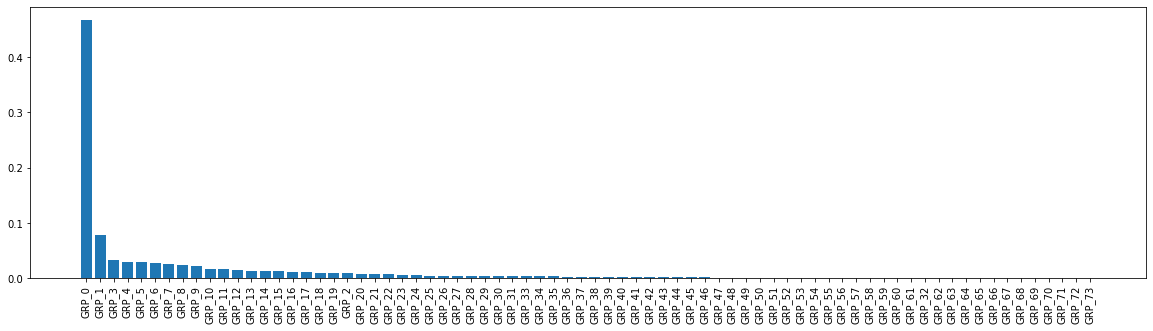

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize = [20,5])
plt.bar(df["Assignment group"].unique(),df["Assignment group"].value_counts()/df.shape[0])
#sns.countplot(df["Assignment group"])
p=plt.xticks(rotation=90)

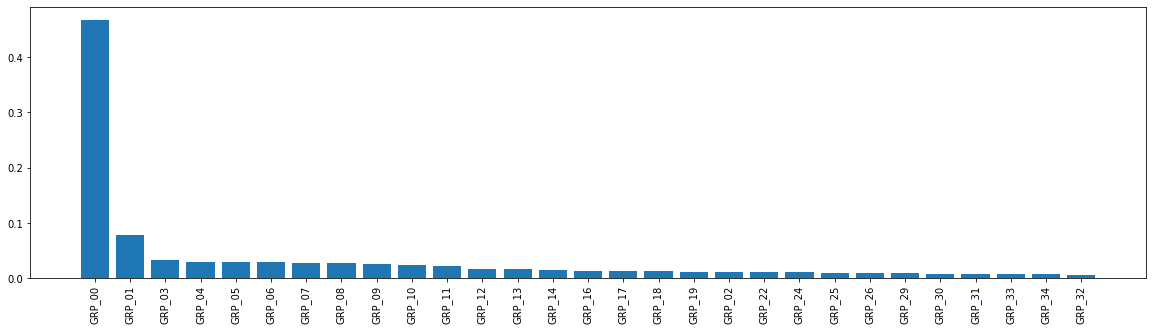

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize = [20,5])
plt.bar(df_clean["Assignment group"].unique(),df_clean["Assignment group"].value_counts()/df_clean.shape[0])
#sns.countplot(df["Assignment group"])
p=plt.xticks(rotation=90)

# Getting Tf-Idf for each group and then calculating cosine similarity between groups

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64 

Short description    8
Description          1
Caller               0
Assignment group     0
desc_or_shrt_desc    0
dtype: int64


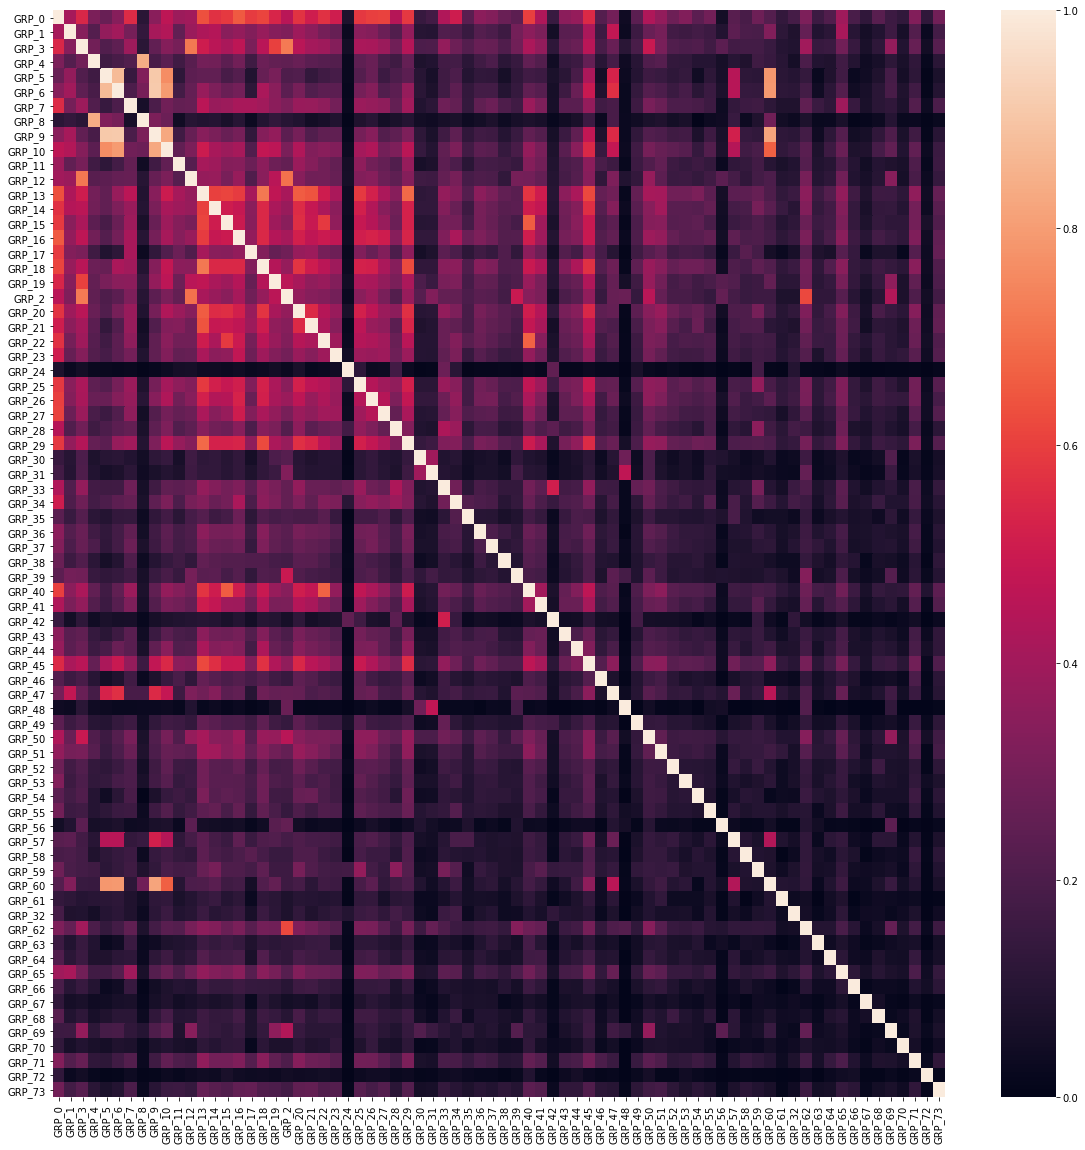

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
import numpy as np

#Getting number of rows with missing data
print(df.isna().sum(),"\n")
#First, we will create desc2_or_shrt_desc2 column
#This column is =desc2 when desc2 is present, else it will be =shrt_desc2
df["desc_or_shrt_desc"] = np.where(df["Description"].isna()==True,  df["Short description"], df["Description"])
print(df.isnull().sum())


grp_text = []
for i in df["Assignment group"].unique():  
  l1 = " ".join(list(df[df["Assignment group"]==i].desc_or_shrt_desc.astype("str")))
  grp_text.append(l1)

tfidf = TfidfVectorizer()
t = tfidf.fit_transform(grp_text)
from sklearn.metrics.pairwise import cosine_similarity
cos_df = pd.DataFrame(cosine_similarity(t),columns = df["Assignment group"].unique(), index = df["Assignment group"].unique())

#Getting heatmap to visualize the cosine similarities
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(figsize = [20,20])
sns.heatmap(cos_df)

# Getting Tf-Idf and cosine similarities based on that between groups after Description clean-up

Tune max_df to remove words appearing in all documents and hence shorten the vocabulary

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



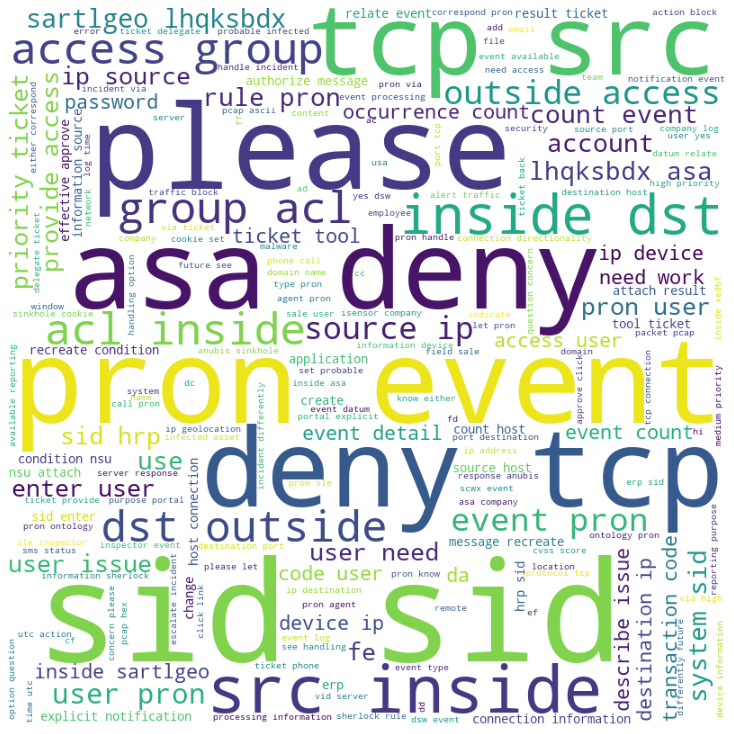

In [8]:
comment_words = ''

from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
for val in df_clean[df_clean["Assignment group"]=="GRP_02"]['Description2']:
      
    # typecaste each val to string
    val = str(val)
    print(comment_words)
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show();




undocking pc screen come back 
undocking pc screen come back internal keybankrd work cs external usb keybankrd 
undocking pc screen come back internal keybankrd work cs external usb keybankrd user issue internet explorer page keep refresh end dll error 
undocking pc screen come back internal keybankrd work cs external usb keybankrd user issue internet explorer page keep refresh end dll error please complete require question return back gsc requester provide require information gsc review ticket able resolve please assign appropriate group per printer problem assignment flowchart printer name make model ex hq wy hp kd detailed description problem error say need download install software driver hostname computer print kd type document print email excel word etc word inwarehouse tool delivery note production order etc system application use time problem ex windows erp window print respond ping command network power cycle printer complete sure mean erp system system ex sid sid hrp plm erp

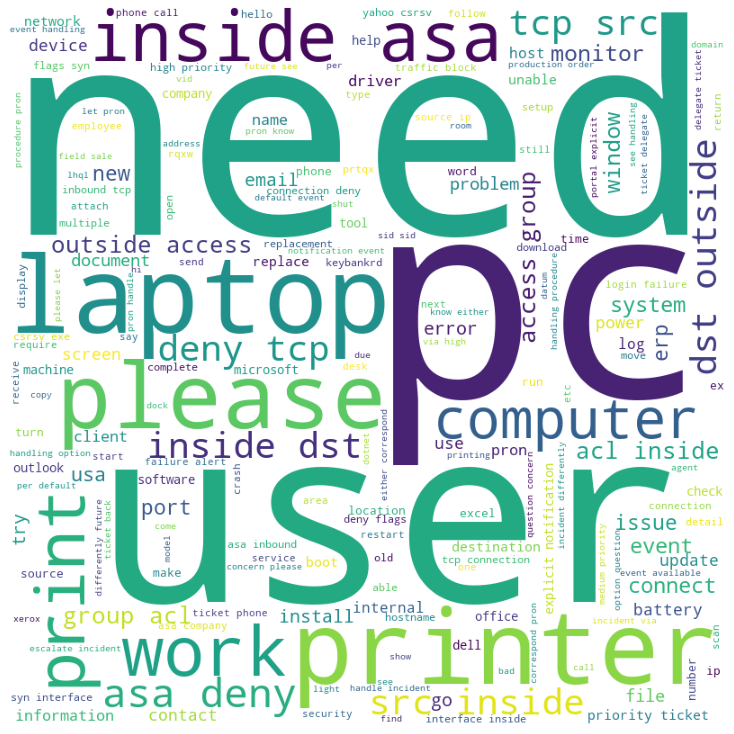

In [9]:
comment_words = ''

from wordcloud import WordCloud, STOPWORDS

for val in df_clean[df_clean["Assignment group"]=="GRP_03"]['Description2']:
      
    # typecaste each val to string
    val = str(val)
    print(comment_words)
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show();



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



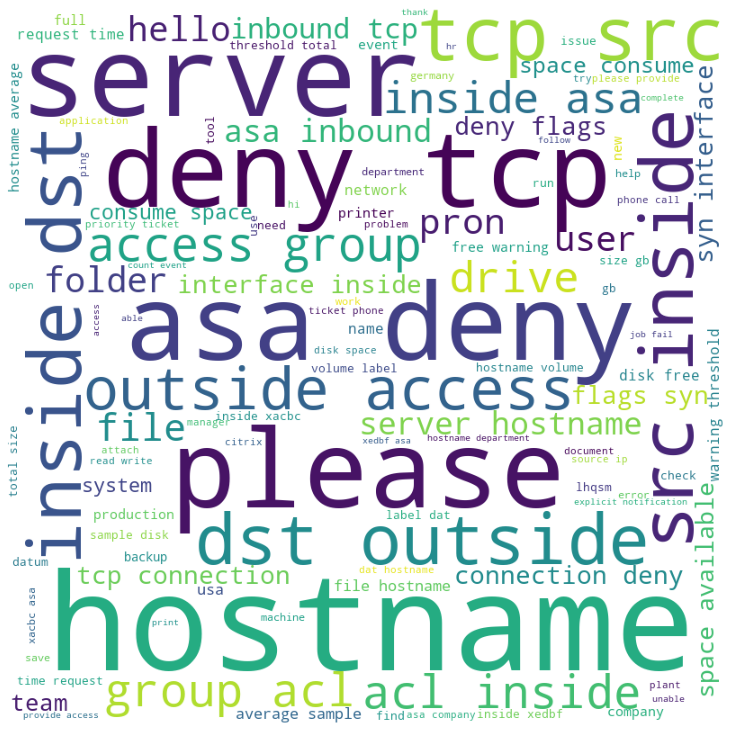

In [10]:
comment_words = ''

from wordcloud import WordCloud, STOPWORDS

for val in df_clean[df_clean["Assignment group"]=="GRP_12"]['Description2']:
      
    # typecaste each val to string
    val = str(val)
    print(comment_words)
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show();



Short description     8
Description           1
Caller                0
Assignment group      0
Short description2    0
Description2          0
dtype: int64 

Short description      8
Description            1
Caller                 0
Assignment group       0
Short description2     0
Description2           0
desc2_or_shrt_desc2    0
dtype: int64


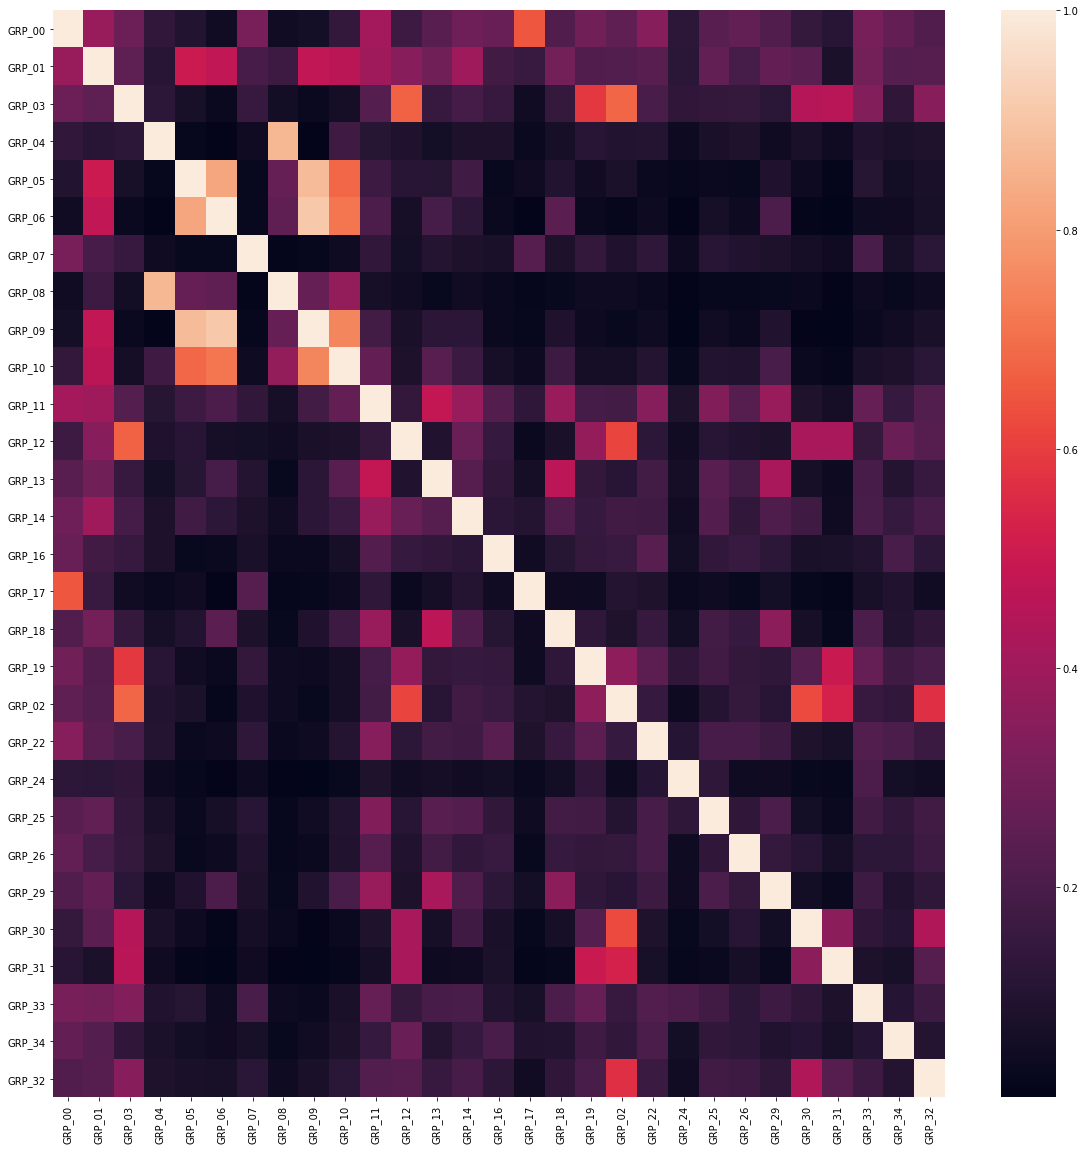

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

#Getting number of rows with missing data
print(df_clean.isna().sum(),"\n")
#First, we will create desc2_or_shrt_desc2 column
#This column is =desc2 when desc2 is present, else it will be =shrt_desc2
df_clean["desc2_or_shrt_desc2"] = np.where(df_clean["Description2"].isna()==True,  df_clean["Short description2"], df_clean["Description2"])
print(df_clean.isnull().sum())


grp_text = []
for i in df_clean["Assignment group"].unique():  
  l1 = " ".join(list(df_clean[df_clean["Assignment group"]==i].desc2_or_shrt_desc2.astype("str")))
  grp_text.append(l1)

#max_df is a hyperparameter. Currently set to exclude all terms that appear in more than 95% of documents
tfidf_clean = TfidfVectorizer(max_df=0.95)
t_clean = tfidf_clean.fit_transform(grp_text)
from sklearn.metrics.pairwise import cosine_similarity
cos_df_clean = pd.DataFrame(cosine_similarity(t_clean),columns = df_clean["Assignment group"].unique(), index = df_clean["Assignment group"].unique())

#Getting heatmap to visualize the cosine similarities
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(figsize = [20,20])
sns.heatmap(cos_df_clean)

#Create further groupings
df_clean["Assignment group"] = np.where(df_clean["Assignment group"].isin(["GRP_06","GRP_09","GRP_10"]),  "GRP_05", df_clean["Assignment group"])
#df_clean["Assignment group"] = np.where(df_clean["Assignment group"].isin(["GRP_12","GRP_02"]),  "GRP_03", df_clean["Assignment group"])
df_clean["Assignment group"] = np.where(df_clean["Assignment group"].isin(["GRP_17"]),  "GRP_00", df_clean["Assignment group"])

In [9]:
#ignore this section. This is for my learning
x = tfidf_clean.get_feature_names()
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')
stopwords = stopwords.words("english")+list(punctuation)

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

# choose some words to be stemmed
words = ["bad", "worse", "worst", "programing", "programers"]

print(list(map(ps.stem,x)))
print(list(map(lemmatizer.lemmatize,x)))

"hello team my meetings skype meetings etc are"


from nltk.tokenize import TreebankWordTokenizer, word_tokenize
  
tokenizer2 = TreebankWordTokenizer()
print(tokenizer2.tokenize("Let's see how it's working."))
print(word_tokenize("Let's see how it's working."))

from nltk.tokenize import RegexpTokenizer
  
tokenizer = RegexpTokenizer("[\w']+")
text = "Let's see how it's working."
a = tokenizer.tokenize(text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['5000', 'aa', 'aaa', 'aacbcc', 'aae', 'aao', 'aaplant', 'ab', 'abandon', 'abap', 'abb', 'abbc', 'abc', 'abca', 'abd', 'abdhtyu', 'abend', 'abend', 'abend', 'abf', 'abgebildet', 'abgrtyreu', 'abhay', 'abil', 'abl', 'abl', 'abod', 'abort', 'abort', 'abov', 'abovemention', 'abrurto', 'absenc', 'absent', 'absolut', 'ac', 'acach', 'acbccb', 'acc', 'acccount', 'acc', 'acced', 'acce', 'accept', 'accept', 'accept', 'acces', 'acceso', 'access', 'access', 'access', 'access', 'accesss', 'accid', 'accident', 'accident', 'accid', 'accompani', 'accomplish', 'accont', 'accord', 'accord', 'accord', 'accordingli', 'accound', 'account', 'account', 'account', 'acco

Heatmap based on Saurabh's cosine matrix

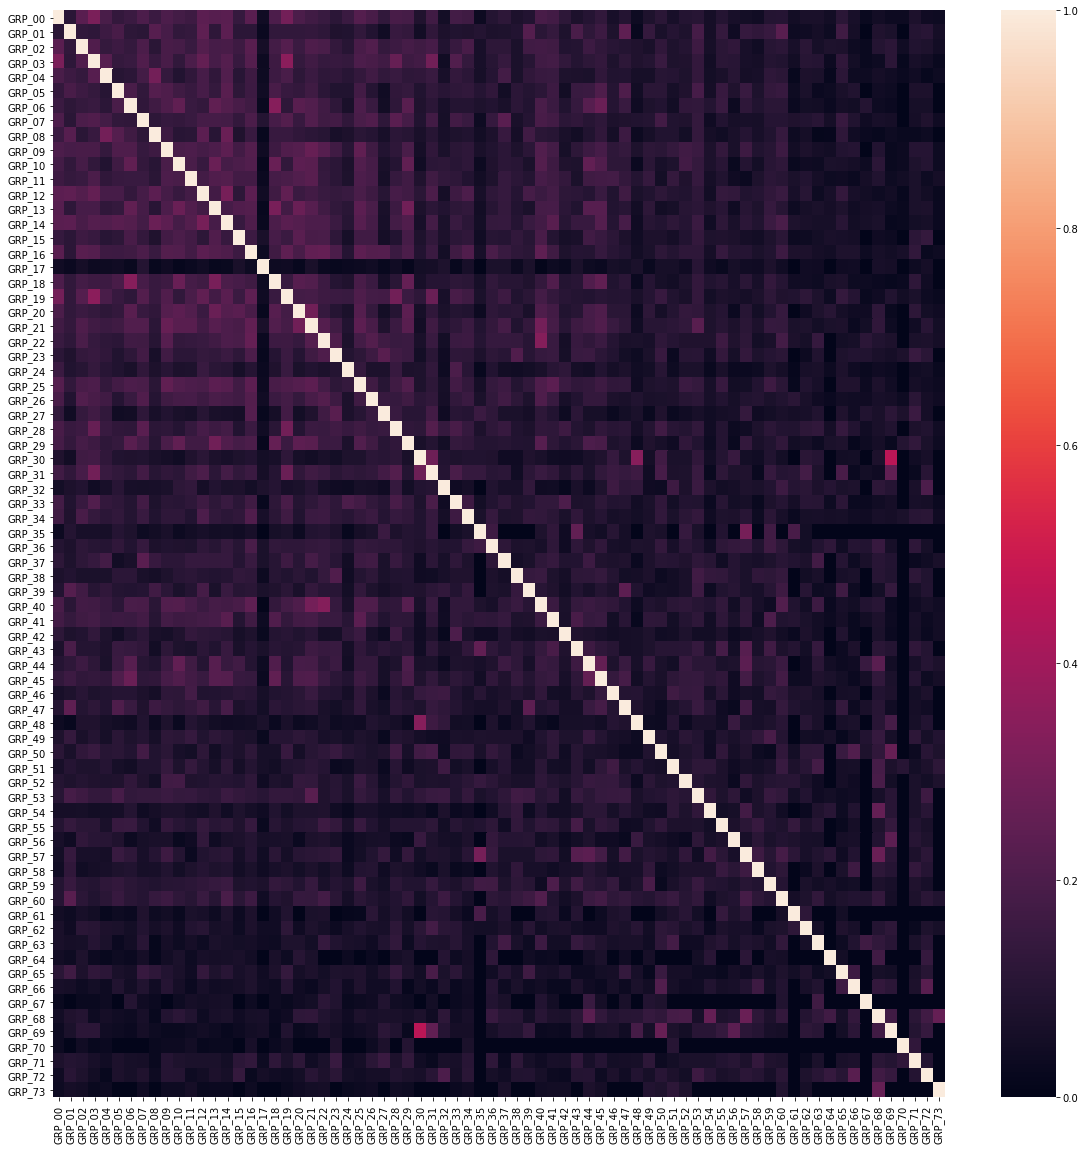

In [13]:
cosine_matrix = open("/content/drive/MyDrive/cosine_matrix.pkl","rb")
cosine_matrix1 = pickle.load(cosine_matrix)
cosine_matrix1.index = cosine_matrix1.columns
fig, axes = plt.subplots(figsize = [20,20])
sns.heatmap(cosine_matrix1)

As a 1st step, I'm trying to build a random forest model by using independent variables from the Tf-Idf matrix. We get the Idf based on group level and apply it to row level data

Currently, all groups with <50 observations are grouped under "GRP_100"

Note: Hyperparameters will be tuned later

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

#pd.set_option('display.max_rows', None)
df_clean["Assignment group2"] = np.where(df_clean["Assignment group"].isin(df_clean["Assignment group"].value_counts()[df_clean["Assignment group"].value_counts()>50].index),df_clean["Assignment group"], "GRP_100")
#print(df_clean["Assignment group2"].value_counts())

#Label encoding for the dependent variable
y = df_clean["Assignment group2"].astype("category").cat.codes


df_clean["Assignment group3"] = np.where(df_clean["Assignment group"]=="GRP_00",df_clean["Assignment group"], "GRP_100")
y_2levels = np.where(df_clean["Assignment group"]=="GRP_00",1, 0)

df_clean["y"] = y
df5 = df_clean[["Assignment group2","y"]].drop_duplicates(subset = ["Assignment group2","y"])
y_g2i = {i[1]["Assignment group2"]:i[1]["y"] for i in df5.iterrows()}
y_i2g = {i[1]["y"]: i[1]["Assignment group2"] for i in df5.iterrows()}

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

#pd.set_option('display.max_rows', None)
df_clean["Assignment group2"] = np.where(df_clean["Assignment group"].isin(df_clean["Assignment group"].value_counts()[df_clean["Assignment group"].value_counts()>50].index),df_clean["Assignment group"], "GRP_100")
#print(df_clean["Assignment group2"].value_counts())

#Label encoding for the dependent variable
y = df_clean["Assignment group2"].astype("category").cat.codes


df_clean["Assignment group3"] = np.where(df_clean["Assignment group"]=="GRP_00",df_clean["Assignment group"], "GRP_100")
y_2levels = np.where(df_clean["Assignment group"]=="GRP_00",1, 0)

df_clean["y"] = y
df5 = df_clean[["Assignment group2","y"]].drop_duplicates(subset = ["Assignment group2","y"])
y_g2i = {i[1]["Assignment group2"]:i[1]["y"] for i in df5.iterrows()}
y_i2g = {i[1]["y"]: i[1]["Assignment group2"] for i in df5.iterrows()}


from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix


for n_gram in (1,2,3):
  RF = RandomForestClassifier(n_estimators = 100, oob_score=True )

  tfidf_clean = TfidfVectorizer(max_df=0.95,ngram_range=(1,n_gram))
  t_clean = tfidf_clean.fit_transform(grp_text)
  #creating row level tf-idf vector
  t_clean2 = tfidf_clean.fit_transform(df_clean.desc2_or_shrt_desc2)
  x_train,x_test,y_train,y_test = train_test_split(t_clean2,y,test_size = 0.3, random_state = 123)

  start_time = time.clock()
  RF.fit(x_train,y_train)
  train_time = time.clock()-start_time

  #checking model fit/overfit
  print("Random Forest Model with n_gram range (1,{0}) \nOOB score in training data is: {1:.2f} \nTest score is : {2:.2f}\n".format(n_gram,RF.oob_score_,RF.score(x_test,y_test) ))
  
  start_time = time.clock()
  y_test_pred = RF.predict(x_test)
  test_time = time.clock()-start_time

  y_test_unencoded = y_test
  
  confusion_matrix(y_test_unencoded,y_test_pred)
  print(classification_report(y_test_unencoded,y_test_pred))

  

  acc = accuracy_score(y_test_unencoded,y_test_pred)
  precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
  recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
  f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
  cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
  from tensorflow.keras.utils import to_categorical
  AUC = roc_auc_score(to_categorical(y_test_unencoded),to_categorical(y_test_pred),average = 'weighted',multi_class = 'ovr')
  if n_gram ==1:
    RF_model_results_data = pd.DataFrame([["RF with TF-IDF and n_gram: (1,"+str(n_gram)+")",RF.score(x_train,y_train),RF.oob_score_, acc,precision,recall,f1score,AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
  else:
    df2 = pd.DataFrame([["RF with TF-IDF and n_gram: (1,"+str(n_gram)+")",RF.score(x_train,y_train),RF.oob_score_, acc,precision,recall,f1score,AUC, cohen_kappa,train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
    RF_model_results_data = RF_model_results_data.append(df2)
  RF_model_results_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Random Forest Model with n_gram range (1,1) 
OOB score in training data is: 0.65 
Test score is : 0.66



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      0.98      0.79      1233
           1       0.83      0.14      0.24        71
           2       0.81      0.33      0.47        87
           3       0.38      0.09      0.14        58
           4       0.86      0.18      0.30        33
           5       0.57      0.71      0.63       192
           6       1.00      0.12      0.22        24
           7       0.81      0.56      0.66       203
           8       0.78      0.09      0.16        81
           9       0.61      0.51      0.56        78
          10       0.73      0.36      0.48        45
          11       0.60      0.12      0.19        26
          12       0.00      0.00      0.00        25
          13       0.55      0.26      0.35        23
          14       0.36      0.10      0.16        48
          15       0.00      0.00      0.00        38
          16       0.83      0.76      0.79        78
          17       0.62    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Random Forest Model with n_gram range (1,2) 
OOB score in training data is: 0.64 
Test score is : 0.65



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

              precision    recall  f1-score   support

           0       0.64      0.98      0.77      1233
           1       0.73      0.11      0.20        71
           2       0.79      0.34      0.48        87
           3       0.36      0.07      0.12        58
           4       0.86      0.18      0.30        33
           5       0.57      0.69      0.63       192
           6       1.00      0.08      0.15        24
           7       0.82      0.57      0.67       203
           8       0.60      0.04      0.07        81
           9       0.73      0.46      0.57        78
          10       0.62      0.11      0.19        45
          11       0.60      0.12      0.19        26
          12       0.00      0.00      0.00        25
          13       0.55      0.26      0.35        23
          14       0.33      0.08      0.13        48
          15       0.00      0.00      0.00        38
          16       0.87      0.77      0.82        78
          17       0.75    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Random Forest Model with n_gram range (1,3) 
OOB score in training data is: 0.64 
Test score is : 0.65



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1233
           1       0.85      0.15      0.26        71
           2       0.78      0.33      0.47        87
           3       0.40      0.07      0.12        58
           4       0.83      0.15      0.26        33
           5       0.58      0.67      0.62       192
           6       1.00      0.08      0.15        24
           7       0.80      0.57      0.67       203
           8       1.00      0.02      0.05        81
           9       0.74      0.41      0.53        78
          10       0.70      0.16      0.25        45
          11       0.75      0.12      0.20        26
          12       0.00      0.00      0.00        25
          13       0.57      0.17      0.27        23
          14       0.33      0.02      0.04        48
          15       0.00      0.00      0.00        38
          16       0.92      0.76      0.83        78
          17       0.73    

In [16]:
RF_model_results_data

Model Name  train_accuracy  ...  train_time  test_time
0  RF with TF-IDF and n_gram: (1,1)        0.952269  ...   12.871549   0.193460
0  RF with TF-IDF and n_gram: (1,2)        0.952605  ...   48.500367   0.300260
0  RF with TF-IDF and n_gram: (1,3)        0.952773  ...   89.212907   0.371058

[3 rows x 11 columns]

In [17]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test,RF.predict(x_test)))
 

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1233
           1       0.85      0.15      0.26        71
           2       0.78      0.33      0.47        87
           3       0.40      0.07      0.12        58
           4       0.83      0.15      0.26        33
           5       0.58      0.67      0.62       192
           6       1.00      0.08      0.15        24
           7       0.80      0.57      0.67       203
           8       1.00      0.02      0.05        81
           9       0.74      0.41      0.53        78
          10       0.70      0.16      0.25        45
          11       0.75      0.12      0.20        26
          12       0.00      0.00      0.00        25
          13       0.57      0.17      0.27        23
          14       0.33      0.02      0.04        48
          15       0.00      0.00      0.00        38
          16       0.92      0.76      0.83        78
          17       0.73    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training a Word2Vec model on the text data we have

In [18]:
from gensim.models import Word2Vec

# train model
w2v_model = Word2Vec(list(df_clean.Description2.apply(word_tokenize)), min_count=1,size = 200)
# summarize the loaded model
print(w2v_model)
# summarize vocabulary
words = list(w2v_model.wv.vocab)
print(words[0:100])
# access vector for words
#print(w2v_model['employee',"manager"])
# save model
w2v_model.save('w2v_model.bin')
# load model
new_model = Word2Vec.load('w2v_model.bin')

#creating vector of all vocabulary words
X = w2v_model[words]


Word2Vec(vocab=10488, size=200, alpha=0.025)
['verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'ad', 'reset', 'password', 'advise', 'login', 'caller', 'confirm', 'able', 'issue', 'resolve', 'hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'correct', 'kind', 'hi', 'can', 'not', 'log', 'vpn', 'best', 'unable', 'access', 'hr', 'tool', 'page', 'error', 'engineering', 'event', 'critical', 'hostname', 'company', 'com', 'value', 'mountpoint', 'threshold', 'oracle', 'sid', 'erpdata', 'srpsad', 'datum', 'perpsrpsad', 'ticket', 'employment', 'status', 'new', 'non', 'enter', 'disable', 'add', 'ins', 'update', 'inplant', 'say', 'connect', 'submit', 'report', 'site', 'load', 'correctly', 'sgxqsuojr', 'xwbesorf', 'cards', 'want', 'open', 'payslip', 'website', 'try', 'session', 'use', 'link', 'get', 'pls', 'help', 'urgently', 'work', 'home', 'tomorrow', 'due', 'month', 'end', 'close', 'undocking', 'pc', 'screen', 'come']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


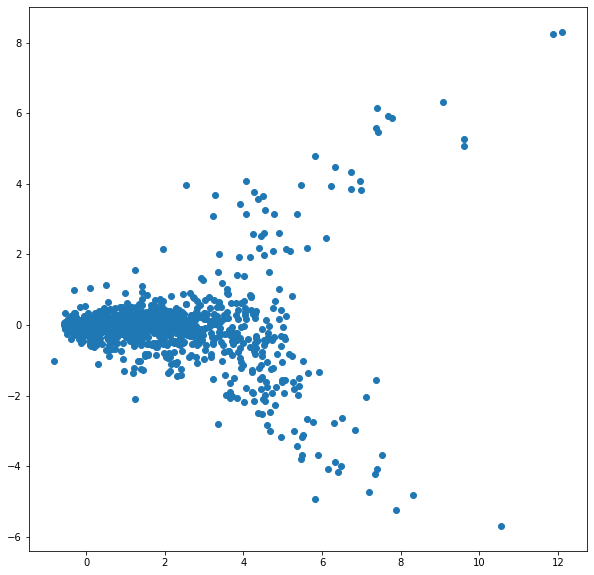

In [19]:
#Plotting words to visualize them
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_
fig, axes = plt.subplots(figsize = [10,10])
plt.scatter(X_pca[:, 0], X_pca[:, 1])

#printing the name of every 5th word on the graph
#for i, word in enumerate(words):
  #if i%5==0 :
	  #plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

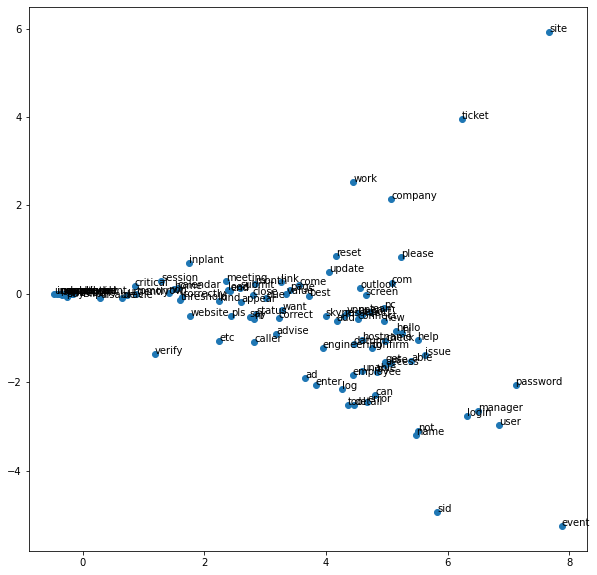

In [20]:
#plotting only 100 words to have a better visualization
fig, axes = plt.subplots(figsize = [10,10])
plt.scatter(X_pca[0:100, 0], X_pca[0:100, 1])
#printing the name of every 5th word on the graph
for i, word in enumerate(words[0:100]):
	plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

# Create word2vec based feature vectors for each word
For a given row, add the vectors of each word of the sentence
This will represent X dataset of independent attributes which will be used in models

In [21]:
#Creating row-level word2vec vectors
x_word2vec = []

for i in list(df_clean.Description2.apply(word_tokenize)):
    feature_vec = np.array([0]*len(w2v_model["login"]))
    cnt = 0
    if len(i) >0:
      for j in i:
        cnt+=1
        feature_vec = (feature_vec*cnt+w2v_model[j])/(cnt+1)
      x_word2vec.append(feature_vec/len(i))
    else:
      x_word2vec.append(feature_vec)  

#Created a 100 dimensional feature vector for each row
pd.DataFrame(x_word2vec).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


(8500, 200)

# Build a Random Forest with word2vec embeddings as input
We get test data accuracy of 61% which is marginally lower than the accuracy using TF-IDF based vectors

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RF_word2vec = RandomForestClassifier(n_estimators = 200, oob_score=True )

x_train,x_test,y_train,y_test = train_test_split(x_word2vec,y,test_size = 0.3, random_state = 123)


RF_word2vec.fit(x_train,y_train)
#checking model fit/overfit
print("OOB score in training data is: {0:.2f} \nTest score is : {1:.2f}".format(RF_word2vec.oob_score_,RF_word2vec.score(x_test,y_test) ))

OOB score in training data is: 0.60 
Test score is : 0.62


# Build a SVM with word2vec embeddings as input
We get test data accuracy of 58% ; hyperparameter tuning not done

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
SVC_word2vec = SVC(C = 10, kernel = 'rbf', gamma = 10, max_iter = 500)

SVC_word2vec.fit(x_train,y_train)
#checking model fit/overfit
print("Score in training data is: {0:.2f} \nTest score is : {1:.2f}".format(SVC_word2vec.score(x_train,y_train),SVC_word2vec.score(x_test,y_test) ))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score in training data is: 0.62 
Test score is : 0.59


# Get pre-trained Wikipedia 6B word embeddings

In [11]:
#creating a dictionary of words and their embeddings
with open("/content/drive/MyDrive/glove.6B.50d.txt",'r') as f:
  w = []
  w_vec = []
  w_dir = {}
  for l in f:
    l_split = l.split()
    w.append(l_split[0])
    w_vec.append(np.asarray(l_split[1:], 'float32'))
    w_dir[l_split[0]] = np.asarray(l_split[1:], 'float32')

# Creating a random forest model using pre-trained glove vectors

In [12]:
x_pre_train_glove = []
# adding vectors of all words in a sentence and then normalizing it for sentence length
for i in list(df_clean.Description2.apply(word_tokenize)):
    feature_vec = np.array([0]*len(w_dir["man"]))
    cnt = 0
    if len(i) >0:
      for j in i:
        if j in w_dir.keys():
          cnt+=1
          feature_vec = (feature_vec*cnt+np.array(w_dir[j]))/(cnt+1)
      x_pre_train_glove.append(feature_vec/len(i))
    else:
      x_pre_train_glove.append(feature_vec)  

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RF_pre_train_glove = RandomForestClassifier(n_estimators = 200, oob_score=True )

x_train,x_test,y_train,y_test = train_test_split(x_pre_train_glove,y,test_size = 0.3, random_state = 123)


RF_pre_train_glove.fit(x_train,y_train)
#checking model fit/overfit
print("OOB score in training data is: {0:.2f} \nTest score is : {1:.2f}".format(RF_pre_train_glove.oob_score_,RF_pre_train_glove.score(x_test,y_test) ))

OOB score in training data is: 0.60 
Test score is : 0.61


In [27]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test,RF_pre_train_glove.predict(x_test)))
 #check top 2 or top 3 accuracy

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      1233
           1       1.00      0.06      0.11        71
           2       0.74      0.20      0.31        87
           3       0.00      0.00      0.00        58
           4       0.67      0.12      0.21        33
           5       0.57      0.67      0.61       192
           6       0.00      0.00      0.00        24
           7       0.81      0.53      0.64       203
           8       0.40      0.02      0.05        81
           9       0.76      0.21      0.32        78
          10       0.21      0.07      0.10        45
          11       0.33      0.04      0.07        26
          12       0.00      0.00      0.00        25
          13       0.20      0.04      0.07        23
          14       0.00      0.00      0.00        48
          15       1.00      0.03      0.05        38
          16       0.86      0.47      0.61        78
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Building a RNN model
First we will create a dictionary for vocabulary of our dataset

Then we will substitue the words with their index in the dataset

Next, we will create an embedding matrix whose rows will be of vocabulary size and columns will be the dimension of glove embedding

In [13]:
#creating dataset vocabulary using pre-trained GloVe
dataset_vocab = set(j for i in list(df_clean.Description2.apply(word_tokenize)) for j in i)
dataset_dict_i2w = {}
dataset_dict_w2i = {}
for i,j in enumerate(dataset_vocab):
  dataset_dict_i2w[i]=j
  dataset_dict_w2i[j]=i

#defining embedding matrix for the dataset vocabulary using glove vectors
#adding one extra variable to vocabulary whose zero embedding will be used for dataset with missing description
embed_matrix = np.zeros([len(dataset_vocab)+1,len(w_dir["man"])],dtype = 'float32')
#print(embed_matrix.shape)

for i in range(len(dataset_vocab)):
  if dataset_dict_i2w[i] in w_dir.keys():
    embed_matrix[i,:]=w_dir[dataset_dict_i2w[i]]

#print(embed_matrix.shape)
#print(dataset_dict_i2w[0], embed_matrix[0,:],"\n",w_dir[dataset_dict_i2w[0]] )


In [14]:
#creating embedding matrix using Word2Vec
#adding one extra variable to vocabulary whose zero embedding will be used for dataset with missing description
embed_matrix_word2vec = np.zeros([len(dataset_vocab)+1,len(w2v_model["login"])],dtype = 'float32')
#print(embed_matrix_word2vec.shape)

for i in range(len(dataset_vocab)):
  #words is word2vec vocabulary
  if dataset_dict_i2w[i] in words:
    embed_matrix_word2vec[i,:]=w2v_model[dataset_dict_i2w[i]]

#print(embed_matrix.shape)
#print(dataset_dict_i2w[0], embed_matrix_word2vec[0,:],"\n",w2v_model[dataset_dict_i2w[0]] )

#zero_embed_words in word2vec
zero_embed_words_w2v = []
for j, i in enumerate(embed_matrix_word2vec[0:len(dataset_vocab)-1,:]):
  if sum(i)==0:
    zero_embed_words_w2v.append(dataset_dict_i2w[j])
zero_embed_words_w2v


NameError: ignored

In [15]:
#zero_embed_words
zero_embed_words = []
for j, i in enumerate(embed_matrix[0:len(dataset_vocab)-1,:]):
  if sum(i)==0:
    zero_embed_words.append(dataset_dict_i2w[j])
zero_embed_words.append(" ")

In [31]:
print(len([i for i in embed_matrix ]),len([i for i in embed_matrix if sum(i)==0]))

10489 5324


# Brainstorm on which embedding should be chosen: pre-trained or dataset trained?

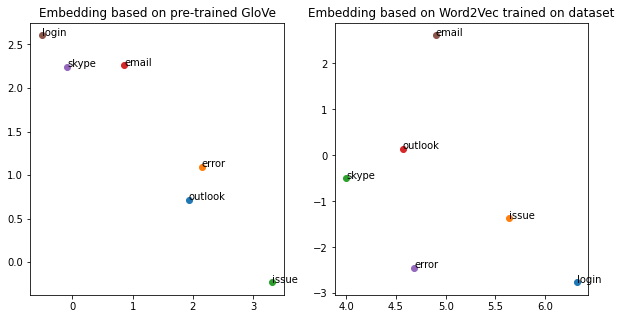

In [32]:
#Plotting words to visualize them
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
embed_matrix_pca = pca1.fit_transform(embed_matrix)
pca1.explained_variance_ratio_
fig, axes = plt.subplots(1,2,figsize = [10,5])

#Comparing tre-trained vs. dataset trained embeddings
for i, word in enumerate(dataset_vocab):
  if word in ("login","issue","outlook","email","error","skype"):
    axes[0].set_title("Embedding based on pre-trained GloVe")
    axes[0].scatter(embed_matrix_pca[i, 0], embed_matrix_pca[i, 1])
    axes[0].annotate(word, xy=(embed_matrix_pca[i, 0], embed_matrix_pca[i, 1]))

for i, word in enumerate(words):
  if word in ("login","issue","outlook","email","error","skype"):
    axes[1].set_title("Embedding based on Word2Vec trained on dataset")
    axes[1].scatter(X_pca[i, 0], X_pca[i, 1])
    axes[1].annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

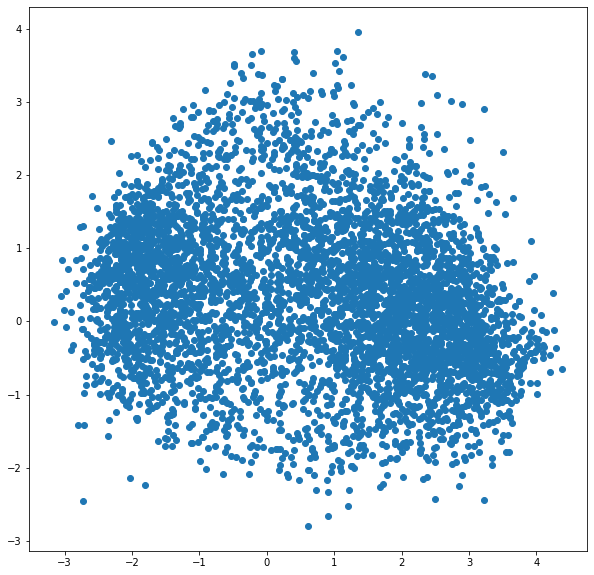

In [33]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
embed_matrix_pca = pca1.fit_transform(embed_matrix)
pca1.explained_variance_ratio_
fig, axes = plt.subplots(figsize = [10,10])

plt.scatter(embed_matrix_pca[:, 0], embed_matrix_pca[:, 1])

#printing the name of every 5th word on the graph
#for i, word in enumerate(dataset_vocab):
  #if i%5==0 :
	  #plt.annotate(word, xy=(embed_matrix_pca[i, 0], embed_matrix_pca[i, 1]))

In [34]:
#df_clean["w2i"] = ["-".join(list(map(lambda x: str(x),i))) for i in x_input_RNN]
#df_clean.to_csv("/content/drive/MyDrive/df_clean.csv")

# Data manipulation for neural networks
Mapping words to indices
Creating input matrix for neural network's embedding layer
Capping sentence length based on quantiles of sentence length of the dataset
Padding sentences with length shorter than capped maximum length

In [16]:
#mapping words to indices in te input dataset
#this will then be passed to the neural network's embedding layer which is pre-trained using glove embeddings
import tensorflow as tf
x_input_RNN = []
length = 0
for i in list(df_clean.desc2_or_shrt_desc2.apply(word_tokenize)):
    length = max(len(i),length)
    if len(i) >0:
      l1 = []
      for j in i:
        #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
        if j not in zero_embed_words:
          l1.append(dataset_dict_w2i[j])
      x_input_RNN.append(l1)
    else:
      x_input_RNN.append([len(dataset_vocab)]) 
# Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

x_len = [len(i) for i in x_input_RNN]
print("Different sentences have different length. Here are the stats: Mean:{} \nSTD:{} \nMedian:{} \nQuantiles-[10,25,50,75,90,95,99,max]: {}"
      .format(np.mean(np.array(x_len)),
      np.std(np.array(x_len)),
      np.median(np.array(x_len)),
      np.quantile(np.array(x_len),[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
              )
      )
#Given the above distribution, we will set the max length to 100 words. 
#Keeping the value to be 891 will slow down model development and add no incremental value in
maxLen = 25
x_input_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')

Different sentences have different length. Here are the stats: Mean:14.51964705882353 
STD:33.416413224890086 
Median:6.0 
Quantiles-[10,25,50,75,90,95,99,max]: [  2.     4.     6.    14.    29.    47.    99.04 782.  ]


# **Simple RNN model**

Glove embedding

Trained on actual data that is not resampled or split into 2 levels

In [19]:
#Simple RNN model using GloVe embeddings trained on Wikipedia 6B
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical

vocab_len = len(dataset_vocab)+1

#GloVe embedding matrix
embed_vector_len = embed_matrix.shape[1]

#Wor2Vec embedding matrix
#embed_vector_len = embed_matrix_word2vec.shape[1]


y_encoded = to_categorical(y)
x_train,x_test,y_train,y_test = train_test_split(x_input_RNN,y_encoded,test_size = 0.3, random_state = 123)

In [36]:
#Simple RNN model using GloVe embeddings trained on Wikipedia 6B
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical

vocab_len = len(dataset_vocab)+1

#GloVe embedding matrix
embed_vector_len = embed_matrix.shape[1]

#Wor2Vec embedding matrix
#embed_vector_len = embed_matrix_word2vec.shape[1]


y_encoded = to_categorical(y)
x_train,x_test,y_train,y_test = train_test_split(x_input_RNN,y_encoded,test_size = 0.3, random_state = 123)

input = Input(shape = (x_input_RNN.shape[1],))

#GloVe embedding matrix
embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)

#Wor2Vec embedding matrix
#embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix_word2vec], trainable=False)(input)

#X = Flatten()(embeddings)
X = SimpleRNN(50, return_sequences=False, dropout = 0.1)(embeddings)

#X = Dense(1000, activation='relu')(X)
#X = Dropout(0.3)(X)
X = Dense(50, activation='relu')(X)
X = Dropout(0.3)(X)

X = Dense(y_encoded.shape[1], activation='softmax')(X)

model = Model(inputs=input, outputs=X)

Adam = tf.keras.optimizers.Adam()
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr # I use ._decayed_lr method instead of .lr
    return lr

lr_metric = get_lr_metric(Adam)

model.compile(optimizer= Adam, loss='categorical_crossentropy', metrics=['accuracy',lr_metric])
model.summary()

#Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=10, min_lr=0.00001, min_delta = 0.0001,verbose = 1)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/RNN_model_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
RNN_history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

#RNN_history = model.fit(x_train, y_train, batch_size=64, epochs=1000, validation_split = 0.3,callbacks = [reduce_lr])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 25, 50)            524450    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
Total params: 533,325
Trainable params: 8,875
Non-trainable params: 524,450
___________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


66/66 [==============================] - 6s 40ms/step - loss: 2.7890 - accuracy: 0.2763 - lr: 1.0000e-03 - val_loss: 2.0029 - val_accuracy: 0.5188 - val_lr: 0.0010
Epoch 2/100
66/66 [==============================] - 2s 34ms/step - loss: 2.0897 - accuracy: 0.5144 - lr: 1.0000e-03 - val_loss: 1.8916 - val_accuracy: 0.5339 - val_lr: 0.0010
Epoch 3/100
66/66 [==============================] - 2s 34ms/step - loss: 1.9429 - accuracy: 0.5380 - lr: 1.0000e-03 - val_loss: 1.8371 - val_accuracy: 0.5445 - val_lr: 0.0010
Epoch 4/100
66/66 [==============================] - 2s 35ms/step - loss: 1.8791 - accuracy: 0.5376 - lr: 1.0000e-03 - val_loss: 1.7926 - val_accuracy: 0.5479 - val_lr: 0.0010
Epoch 5/100
66/66 [==============================] - 2s 35ms/step - loss: 1.8296 - accuracy: 0.5490 - lr: 1.0000e-03 - val_loss: 1.7645 - val_accuracy: 0.5535 - val_lr: 0.0010
Epoch 6/100
66/66 [==============================] - 2s 36ms/step - loss: 1.7596 - accuracy: 0.5562 - lr: 1.0000e-03 - val_loss: 1.7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


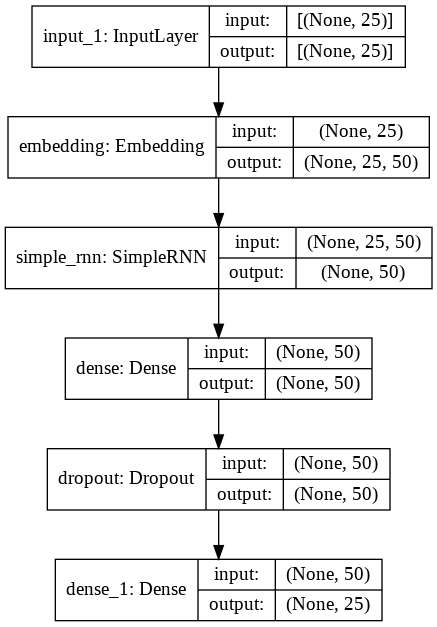

In [37]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model, to_file='RNN_model.png', show_shapes=True, show_layer_names=True)
Image('RNN_model.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'lr', 'val_loss', 'val_accuracy', 'val_lr'])


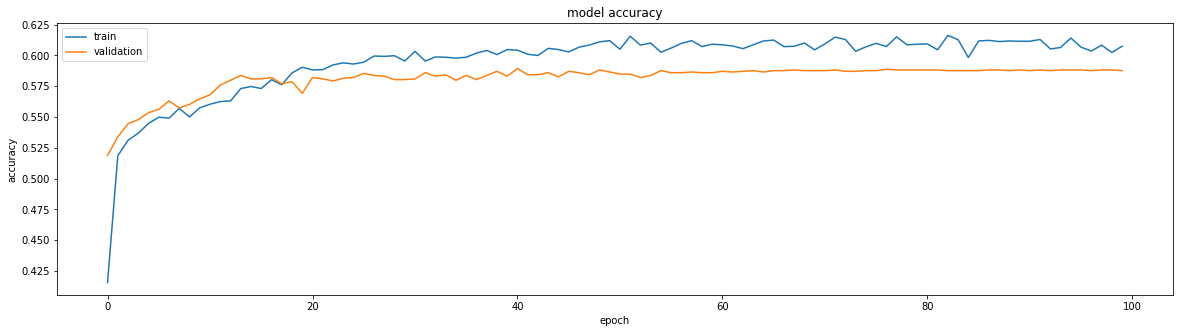

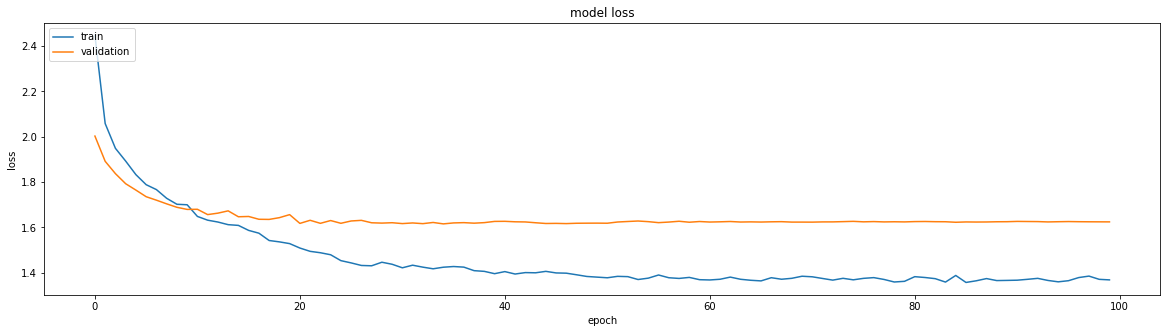

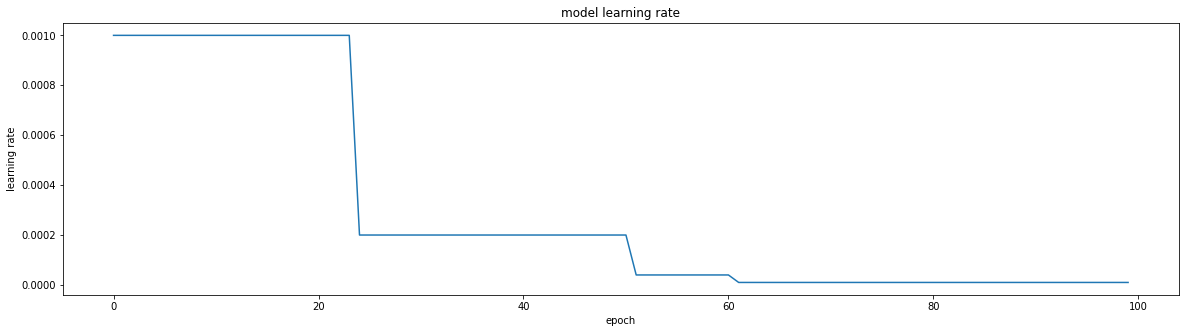

In [38]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model, to_file='RNN_model.png', show_shapes=True, show_layer_names=True)
Image('RNN_model.png')
print(RNN_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_history.history['accuracy'])
plt.plot(RNN_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_history.history['loss'])
plt.plot(RNN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [39]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score,f1_score

acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
AUC = roc_auc_score(to_categorical(y_test_unencoded),model.predict(x_test),average = 'weighted',multi_class = 'ovr')

model_results_data = pd.DataFrame([["RNN with 50d GloVe",RNN_history.history['accuracy'][-1],RNN_history.history['val_accuracy'][-1], acc,precision,recall,f1score,AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-de

              precision    recall  f1-score   support

           0       0.65      0.96      0.77      1233
           1       0.00      0.00      0.00        71
           2       0.44      0.05      0.08        87
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        33
           5       0.41      0.64      0.50       192
           6       0.00      0.00      0.00        24
           7       0.69      0.52      0.60       203
           8       0.17      0.11      0.13        81
           9       0.32      0.28      0.30        78
          10       0.17      0.16      0.16        45
          11       0.10      0.04      0.06        26
          12       0.00      0.00      0.00        25
          13       0.17      0.04      0.07        23
          14       0.00      0.00      0.00        48
          15       0.00      0.00      0.00        38
          16       0.60      0.47      0.53        78
          17       0.00    

Model Name  train_accuracy  ...  train_time  test_time
0  RNN with 50d GloVe        0.607443  ...    357.5145     0.5524

[1 rows x 11 columns]

In [40]:
#LSTM model on pre-trained GloVe
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = LSTM(50, return_sequences=False,dropout = 0.1)(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_LSTM = Model(inputs=input, outputs=X)
model_LSTM.summary()
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_model_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_history = model_LSTM.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
Total params: 548,475
Trainable params: 24,025
Non-trainable params: 524,450
________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


66/66 [==============================] - 29s 20ms/step - loss: 2.6422 - accuracy: 0.4086 - val_loss: 1.9384 - val_accuracy: 0.5305
Epoch 2/100
66/66 [==============================] - 1s 11ms/step - loss: 1.9255 - accuracy: 0.5358 - val_loss: 1.7789 - val_accuracy: 0.5429
Epoch 3/100
66/66 [==============================] - 1s 12ms/step - loss: 1.7918 - accuracy: 0.5466 - val_loss: 1.6948 - val_accuracy: 0.5445
Epoch 4/100
66/66 [==============================] - 1s 12ms/step - loss: 1.7296 - accuracy: 0.5530 - val_loss: 1.6600 - val_accuracy: 0.5473
Epoch 5/100
66/66 [==============================] - 1s 11ms/step - loss: 1.6535 - accuracy: 0.5609 - val_loss: 1.6225 - val_accuracy: 0.5585
Epoch 6/100
66/66 [==============================] - 1s 11ms/step - loss: 1.6368 - accuracy: 0.5674 - val_loss: 1.6108 - val_accuracy: 0.5619
Epoch 7/100
66/66 [==============================] - 1s 11ms/step - loss: 1.6489 - accuracy: 0.5570 - val_loss: 1.5791 - val_accuracy: 0.5697
Epoch 8/100
66/66

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


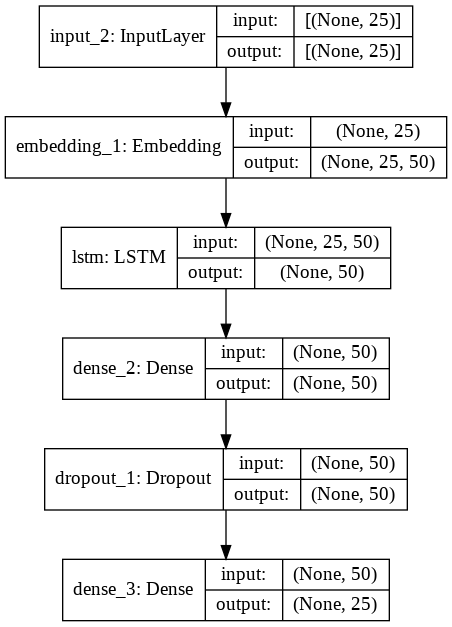

In [41]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_LSTM, to_file='model_LSTM.png', show_shapes=True, show_layer_names=True)
Image('model_LSTM.png',width = 400, height = 500)

# LSTM model result plots

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


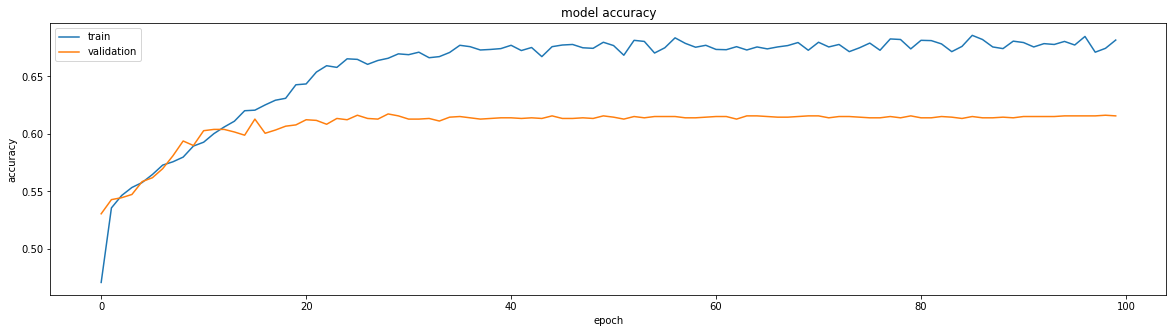

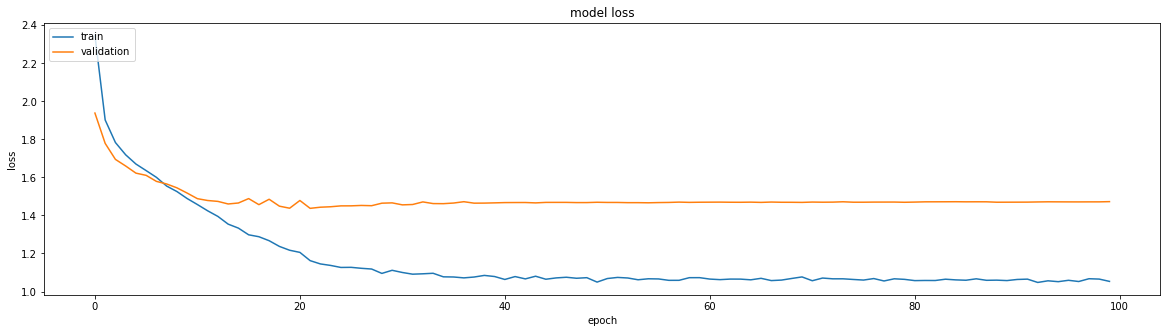

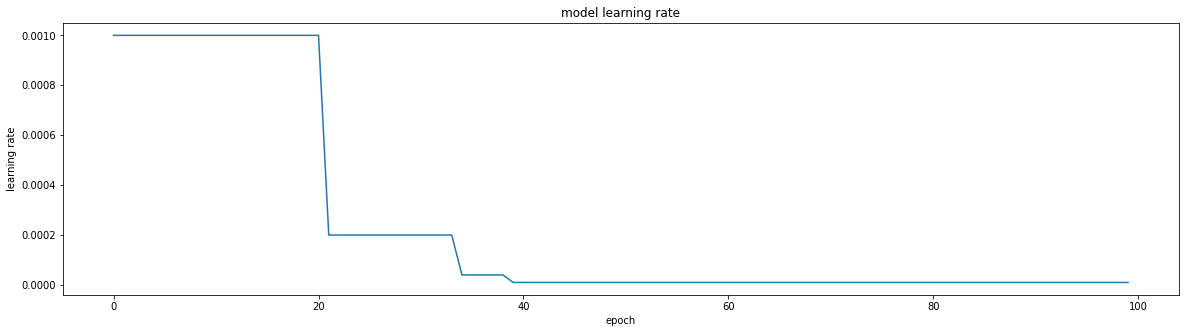

In [42]:
print(LSTM_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

# LSTM model performance metrics

In [43]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_LSTM.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_LSTM.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["LSTM with 50d GloVe",LSTM_history.history['accuracy'][-1],LSTM_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-de

              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1233
           1       0.20      0.03      0.05        71
           2       0.49      0.24      0.32        87
           3       0.32      0.21      0.25        58
           4       0.24      0.18      0.21        33
           5       0.49      0.67      0.56       192
           6       0.00      0.00      0.00        24
           7       0.71      0.54      0.62       203
           8       0.17      0.12      0.14        81
           9       0.38      0.38      0.38        78
          10       0.25      0.24      0.25        45
          11       0.17      0.15      0.16        26
          12       0.38      0.12      0.18        25
          13       0.27      0.13      0.18        23
          14       0.24      0.08      0.12        48
          15       0.00      0.00      0.00        38
          16       0.62      0.68      0.65        78
          17       0.18    

Model Name  train_accuracy  ...  train_time  test_time
0   RNN with 50d GloVe        0.607443  ...  357.514500   0.552400
1  LSTM with 50d GloVe        0.681633  ...   85.407689   0.665582

[2 rows x 11 columns]

# Bi-directional LSTM model with pre-trained GloVe

In [44]:
#Bi-directional LSTM model on pre-trained GloVe
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(50, return_sequences=False,dropout = 0.1))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_bi_LSTM = Model(inputs=input, outputs=X)
model_bi_LSTM.summary()
model_bi_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_bi_model_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_bi_history = model_bi_LSTM.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               40400     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
Total params: 571,175
Trainable params: 46,725
Non-trainable params: 524,450
________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


66/66 [==============================] - 5s 32ms/step - loss: 2.6287 - accuracy: 0.4163 - val_loss: 1.9073 - val_accuracy: 0.5384
Epoch 2/100
66/66 [==============================] - 1s 19ms/step - loss: 1.9389 - accuracy: 0.5375 - val_loss: 1.7759 - val_accuracy: 0.5473
Epoch 3/100
66/66 [==============================] - 1s 19ms/step - loss: 1.7664 - accuracy: 0.5645 - val_loss: 1.6944 - val_accuracy: 0.5630
Epoch 4/100
66/66 [==============================] - 1s 19ms/step - loss: 1.7368 - accuracy: 0.5510 - val_loss: 1.6560 - val_accuracy: 0.5681
Epoch 5/100
66/66 [==============================] - 1s 18ms/step - loss: 1.6551 - accuracy: 0.5614 - val_loss: 1.6009 - val_accuracy: 0.5697
Epoch 6/100
66/66 [==============================] - 1s 19ms/step - loss: 1.5938 - accuracy: 0.5726 - val_loss: 1.5850 - val_accuracy: 0.5731
Epoch 7/100
66/66 [==============================] - 1s 18ms/step - loss: 1.5244 - accuracy: 0.5874 - val_loss: 1.5371 - val_accuracy: 0.5754
Epoch 8/100
66/66 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


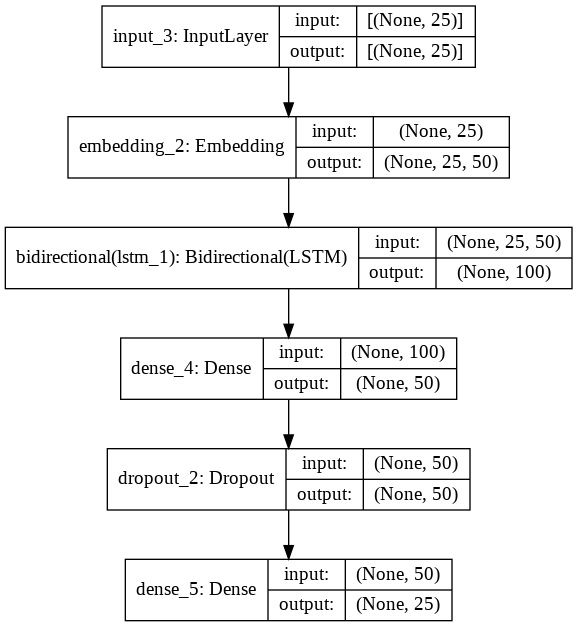

In [45]:
model_name = "model_bi_LSTM"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


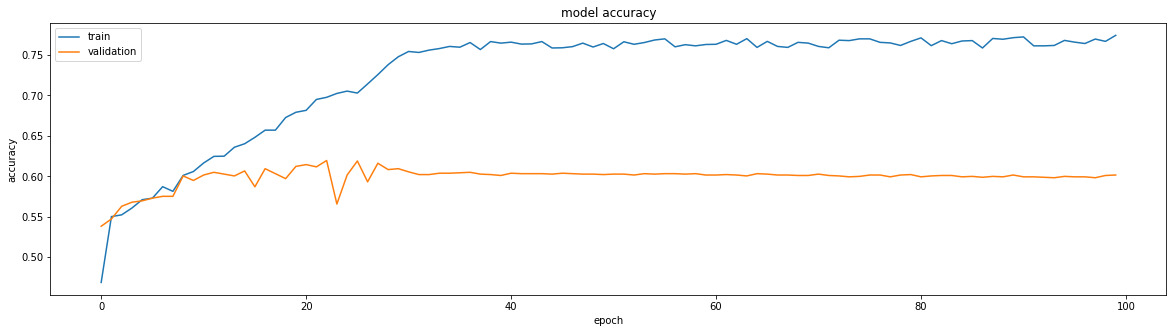

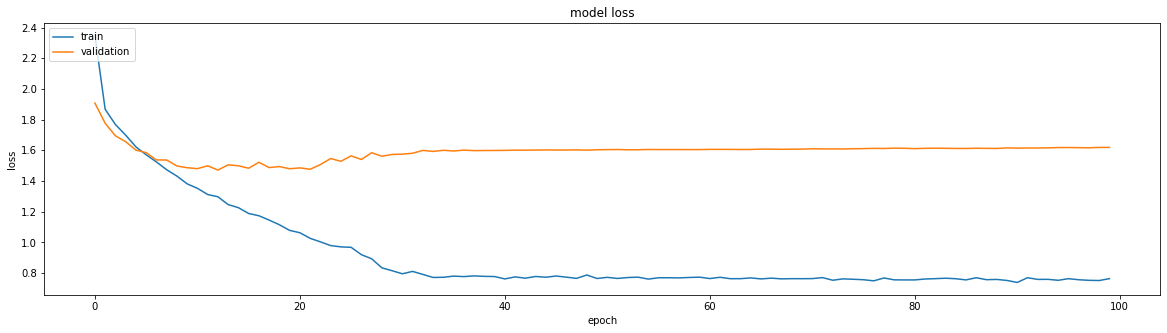

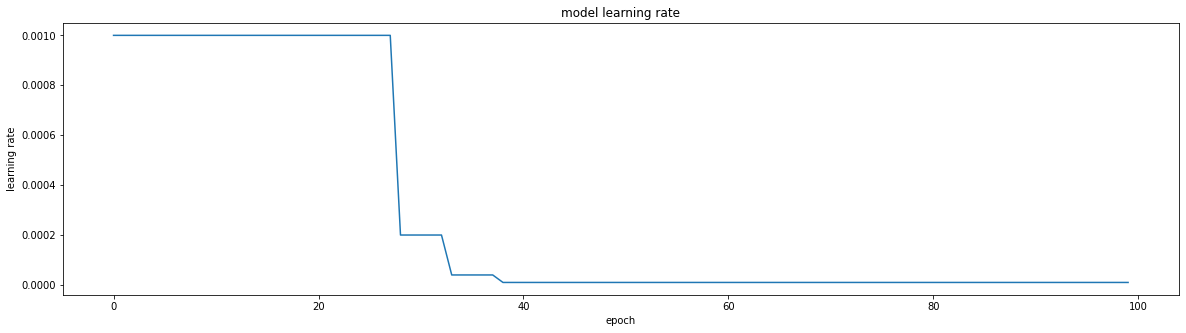

In [46]:
print(LSTM_bi_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history.history['accuracy'])
plt.plot(LSTM_bi_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history.history['loss'])
plt.plot(LSTM_bi_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [47]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_bi_LSTM.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["Bidirectional LSTM with 50d GloVe",LSTM_bi_history.history['accuracy'][-1],LSTM_bi_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-de

              precision    recall  f1-score   support

           0       0.74      0.90      0.82      1233
           1       0.15      0.04      0.07        71
           2       0.47      0.31      0.37        87
           3       0.22      0.17      0.19        58
           4       0.36      0.24      0.29        33
           5       0.49      0.69      0.57       192
           6       0.67      0.08      0.15        24
           7       0.76      0.53      0.62       203
           8       0.17      0.19      0.18        81
           9       0.41      0.37      0.39        78
          10       0.25      0.20      0.22        45
          11       0.19      0.19      0.19        26
          12       0.35      0.24      0.29        25
          13       0.21      0.26      0.24        23
          14       0.28      0.29      0.29        48
          15       0.12      0.03      0.04        38
          16       0.59      0.65      0.62        78
          17       0.21    

Model Name  train_accuracy  ...  train_time  test_time
0                 RNN with 50d GloVe        0.607443  ...  357.514500   0.552400
1                LSTM with 50d GloVe        0.681633  ...   85.407689   0.665582
2  Bidirectional LSTM with 50d GloVe        0.774310  ...  134.661452   1.155545

[3 rows x 11 columns]

# *Bi-directional LSTM *
embedding initialized with GloVe

embedding's trainable parameter set to True

In [21]:
#Bi-directional LSTM model on pre-trained GloVe
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=True)(input)
X = Bidirectional(LSTM(50, return_sequences=False,dropout = 0.1))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_bi_LSTM2 = Model(inputs=input, outputs=X)
model_bi_LSTM2.summary()
model_bi_LSTM2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_bi_model2_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_bi_history2 = model_bi_LSTM2.fit(x_train, y_train, batch_size=64, epochs=25, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 25, 50)            524450    
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               40400     
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
Total params: 571,175
Trainable params: 571,175
Non-trainable params: 0
_______________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


66/66 [==============================] - 6s 39ms/step - loss: 2.6842 - accuracy: 0.3842 - val_loss: 1.9570 - val_accuracy: 0.5333
Epoch 2/25
66/66 [==============================] - 2s 24ms/step - loss: 1.8907 - accuracy: 0.5465 - val_loss: 1.7320 - val_accuracy: 0.5535
Epoch 3/25
66/66 [==============================] - 2s 24ms/step - loss: 1.6581 - accuracy: 0.5692 - val_loss: 1.6187 - val_accuracy: 0.5686
Epoch 4/25
66/66 [==============================] - 2s 24ms/step - loss: 1.5468 - accuracy: 0.5850 - val_loss: 1.5441 - val_accuracy: 0.5916
Epoch 5/25
66/66 [==============================] - 2s 24ms/step - loss: 1.4771 - accuracy: 0.5967 - val_loss: 1.5165 - val_accuracy: 0.5871
Epoch 6/25
66/66 [==============================] - 2s 24ms/step - loss: 1.4491 - accuracy: 0.5938 - val_loss: 1.4688 - val_accuracy: 0.6112
Epoch 7/25
66/66 [==============================] - 2s 24ms/step - loss: 1.3514 - accuracy: 0.6225 - val_loss: 1.4711 - val_accuracy: 0.6140
Epoch 8/25
66/66 [======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


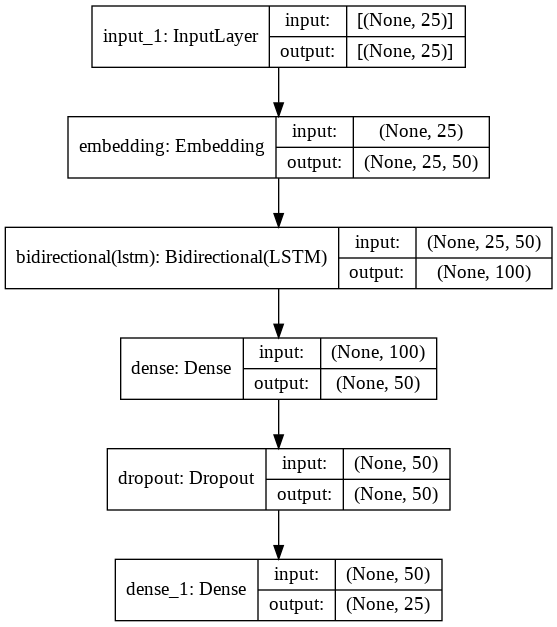

In [22]:
model_name = "model_bi_LSTM2"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM2, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


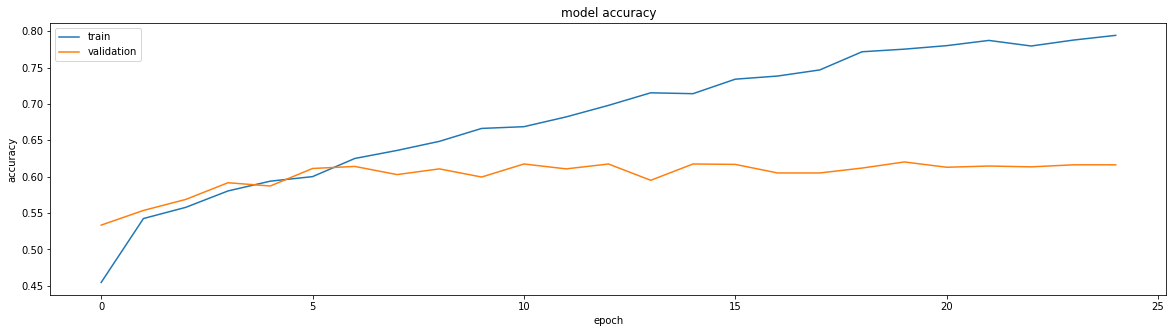

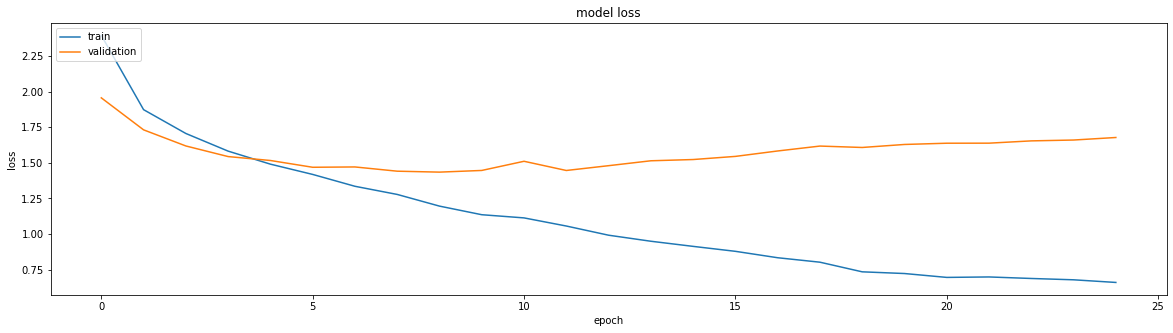

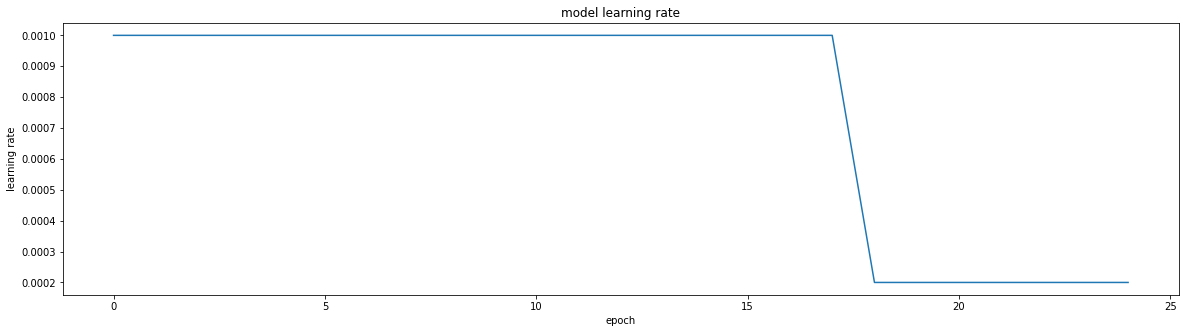

In [23]:
print(LSTM_bi_history2.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history2.history['accuracy'])
plt.plot(LSTM_bi_history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history2.history['loss'])
plt.plot(LSTM_bi_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history2.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [26]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM2.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_bi_LSTM2.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["Bidirectional LSTM with 50d GloVe and trainable embedding",LSTM_bi_history2.history['accuracy'][-1],LSTM_bi_history2.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

#del model_bi_LSTM2,LSTM_bi_history2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-de

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1233
           1       0.13      0.08      0.10        71
           2       0.47      0.43      0.45        87
           3       0.24      0.19      0.21        58
           4       0.50      0.18      0.27        33
           5       0.51      0.69      0.59       192
           6       0.67      0.08      0.15        24
           7       0.72      0.58      0.64       203
           8       0.20      0.31      0.24        81
           9       0.34      0.28      0.31        78
          10       0.26      0.20      0.23        45
          11       0.09      0.12      0.10        26
          12       0.19      0.20      0.19        25
          13       0.41      0.30      0.35        23
          14       0.19      0.21      0.20        48
          15       0.17      0.03      0.05        38
          16       0.66      0.73      0.70        78
          17       0.06    

NameError: ignored

In [5]:
from tensorflow.keras.models import load_model
model_bi_LSTM2 = load_model('/content/drive/MyDrive/LSTM_bi_model2_v4.hdf5')
model_bi_LSTM2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               40400     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 25)                1275      
Total params: 571,175
Trainable params: 571,175
Non-trainable params: 0
_____________________________________________________

#Building a deep neural network with Tf-Idf input vector

In [27]:
#Building a deep neural network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y)

#creating row level tf-idf vector
t_clean2 = tfidf_clean.fit_transform(df_clean.Description2)
x_train,x_test,y_train,y_test = train_test_split(t_clean2.toarray(),y_encoded,test_size = 0.3, random_state = 123)

input = Input(shape = (t_clean2.shape[1],))
X = Dense(1000, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01))(input)
X = Dense(750, activation='relu')(X)
X = Dropout(0.3)(X)
X = Dense(500, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01))(X)
X = Dense(250, activation='relu')(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_NN = Model(inputs=input, outputs=X)

Adam = tf.keras.optimizers.Adam()
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr # I use ._decayed_lr method instead of .lr
    return lr

lr_metric = get_lr_metric(Adam)

model_NN.compile(optimizer= Adam, loss='categorical_crossentropy', metrics=['accuracy',lr_metric])
model_NN.summary()

#Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=10, min_lr=0.00001, min_delta = 0.0001,verbose = 1)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/model_NN_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
NN_history = model_NN.fit(x_train, y_train, batch_size=64, epochs=30, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 9767)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              9768000   
_________________________________________________________________
dense_3 (Dense)              (None, 750)               750750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 25)                6275

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


66/66 [==============================] - 2s 20ms/step - loss: 2.3641 - accuracy: 0.4608 - lr: 1.0000e-03 - val_loss: 1.7314 - val_accuracy: 0.5697 - val_lr: 0.0010
Epoch 2/30
66/66 [==============================] - 1s 14ms/step - loss: 1.5461 - accuracy: 0.5786 - lr: 1.0000e-03 - val_loss: 1.6464 - val_accuracy: 0.5843 - val_lr: 0.0010
Epoch 3/30
66/66 [==============================] - 1s 13ms/step - loss: 1.2493 - accuracy: 0.6258 - lr: 1.0000e-03 - val_loss: 1.5878 - val_accuracy: 0.5927 - val_lr: 0.0010
Epoch 4/30
66/66 [==============================] - 1s 13ms/step - loss: 0.8748 - accuracy: 0.7443 - lr: 1.0000e-03 - val_loss: 1.7380 - val_accuracy: 0.5832 - val_lr: 0.0010
Epoch 5/30
66/66 [==============================] - 1s 13ms/step - loss: 0.6079 - accuracy: 0.8206 - lr: 1.0000e-03 - val_loss: 1.7425 - val_accuracy: 0.6196 - val_lr: 0.0010
Epoch 6/30
66/66 [==============================] - 1s 13ms/step - loss: 0.4112 - accuracy: 0.8920 - lr: 1.0000e-03 - val_loss: 1.8694 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


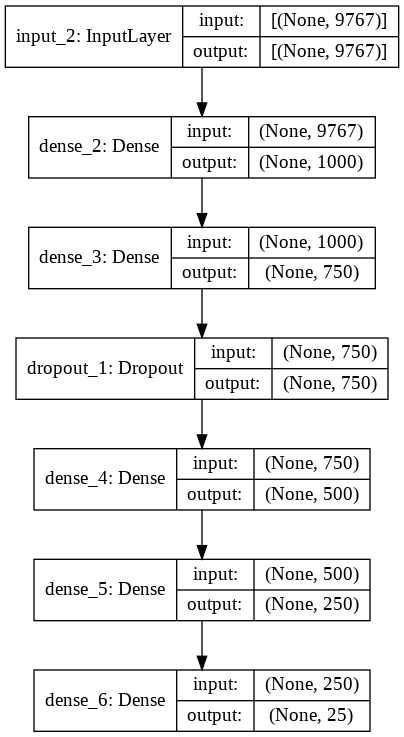

In [28]:
model_name = "model_NN"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_NN, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'lr', 'val_loss', 'val_accuracy', 'val_lr'])


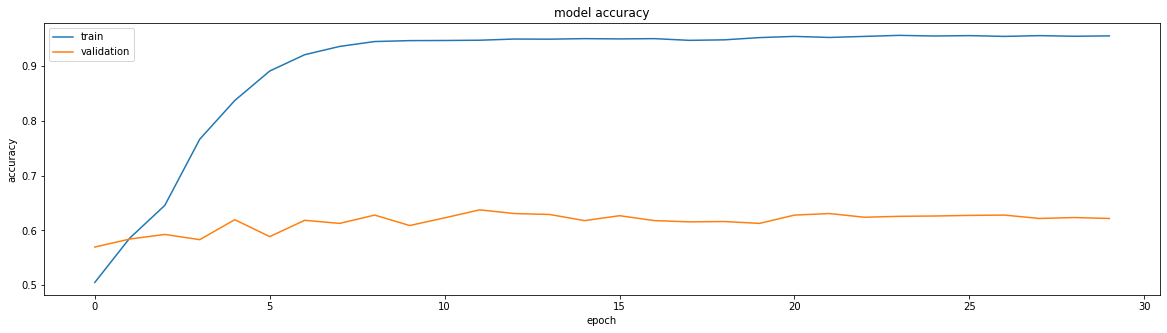

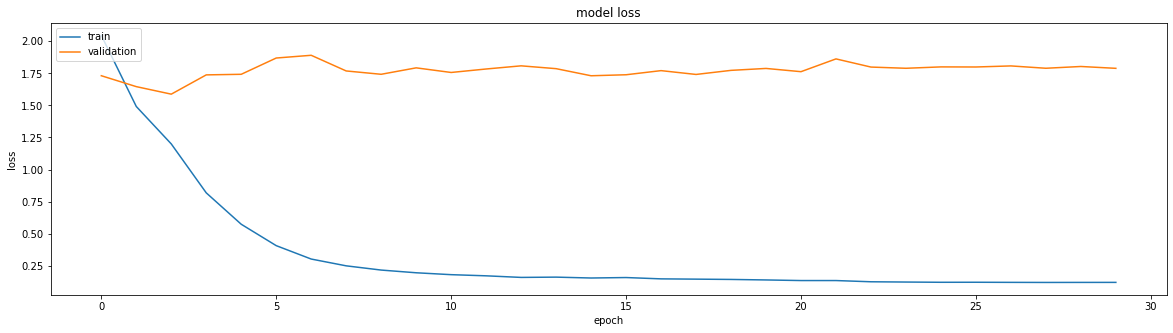

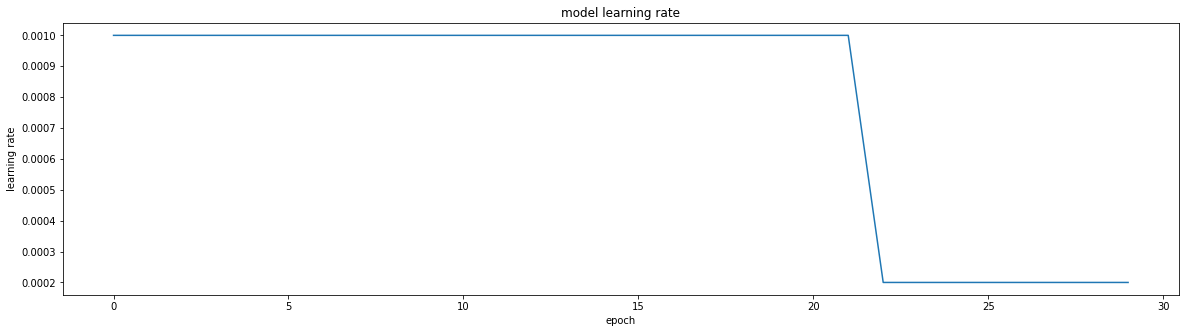

In [29]:
print(NN_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(NN_history.history['accuracy'])
plt.plot(NN_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(NN_history.history['loss'])
plt.plot(NN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(NN_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [30]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_NN.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_NN.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["Feed forward NN with TF-IDF",NN_history.history['accuracy'][-1],NN_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1233
           1       0.32      0.25      0.28        71
           2       0.71      0.37      0.48        87
           3       0.17      0.14      0.15        58
           4       0.46      0.18      0.26        33
           5       0.54      0.71      0.61       192
           6       0.89      0.33      0.48        24
           7       0.76      0.54      0.63       203
           8       0.29      0.27      0.28        81
           9       0.52      0.45      0.48        78
          10       0.30      0.58      0.39        45
          11       0.25      0.12      0.16        26
          12       0.14      0.24      0.17        25
          13       0.23      0.30      0.26        23
          14       0.23      0.31      0.27        48
          15       0.43      0.16      0.23        38
          16       0.83      0.67      0.74        78
          17       0.44    

NameError: ignored

##LSTM with attention

In [32]:
from keras import backend as K

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.initializers import Constant


class Attention_layer(tf.keras.layers.Layer): 
    def __init__(self):    
        # Nothing special to be done here
        super(Attention_layer, self).__init__()
        
    def build(self, input_shape):
        # Define the shape of the weights and bias in this layer
        # As we discussed the layer has just 1 lonely neuron
        # We discussed the shapes of the weights and bias earlier

        self.w=self.add_weight(shape=(2*LSTM_out_dim,1), initializer="normal")
        self.b=self.add_weight(shape=(maxLen,1), initializer="zeros")
        super(Attention_layer, self).build(input_shape)
        
    def call(self, x):

        # Below is the main processing done during training
        # K is the Keras Backend import
        e = K.tanh(K.dot(x,self.w)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        # return the outputs. 'a' is the set of 19 attention weights
        # the second variable is the 'attention adjusted o/p state'
        return a, K.sum(output, axis=1)


y_encoded = to_categorical(y)
x_train,x_test,y_train,y_test = train_test_split(x_input_RNN,y_encoded,test_size = 0.3, random_state = 123)

input = Input(shape = (x_input_RNN.shape[1],))
LSTM_out_dim = 50

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(LSTM_out_dim, return_sequences=True,dropout = 0.4,recurrent_dropout = 0.3))(embeddings)
a, X = Attention_layer()(X)
X = Dense(50, activation='relu')(X)
X = Dropout(0.4)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_LSTM_w_attn = Model(inputs=input, outputs=X)

model_LSTM_w_attn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.00001, min_delta = 0.0001)
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_model_w_attention_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)


#*******************************************************
y_encoded = to_categorical(y)
x_train,x_test,y_train,y_test = train_test_split(x_input_RNN,y_encoded,test_size = 0.3, random_state = 123)

start_time = time.clock()
model_LSTM_w_attn_history = model_LSTM_w_attn.fit(x_train, y_train, batch_size=64, epochs=50, validation_split = 0.3,callbacks = [reduce_lr])
train_time = time.clock()-start_time

from tensorflow.keras.models import save_model
model_LSTM_w_attn.save_model("/content/drive/MyDrive/LSTM_model_w_attention_v4.hdf5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 1/50
66/66 [==============================] - 24s 280ms/step - loss: 2.8353 - accuracy: 0.3901 - val_loss: 2.1364 - val_accuracy: 0.4689
Epoch 2/50
33/66 [==============>...............] - ETA: 8s - loss: 2.2218 - accuracy: 0.4793

KeyboardInterrupt: ignored

In [ ]:
model_name = "model_LSTM_w_attn"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_LSTM_w_attn, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

In [ ]:
print(model_LSTM_w_attn_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_LSTM_w_attn_history.history['accuracy'])
plt.plot(model_LSTM_w_attn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_LSTM_w_attn_history.history['loss'])
plt.plot(model_LSTM_w_attn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_LSTM_w_attn_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [ ]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_LSTM_w_attn.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_LSTM_w_attn.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["LSTM with attention and 50d GloVe",model_LSTM_w_attn_history.history['accuracy'][-1],model_LSTM_w_attn_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

In [ ]:
pd.dataframe()

# **2-level Models**

# **2-level RNN model with trainable GloVe**

In [33]:
#RNN model on pre-trained GloVe
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional,SimpleRNN
from tensorflow.keras.utils import to_categorical
from keras.initializers import Constant

y_encoded = to_categorical(y_2levels)
x_train,x_test,y_train,y_test,y_multi_lvl_train,y_multi_lvl_test = train_test_split(x_input_RNN,y_encoded,y,test_size = 0.3, random_state = 123)


input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len,  embeddings_initializer = Constant(embed_matrix), trainable=False)(input)
X = SimpleRNN(100, return_sequences=False,dropout = 0.5,recurrent_dropout = 0.3)(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.4)(X)
X = Dense(50, activation='relu')(X)
#X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='sigmoid')(X)

RNN_model_1st_lvl = Model(inputs=input, outputs=X)

RNN_model_1st_lvl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=10, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/RNN_model_1st_lvl_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
RNN_model_1st_lvl_history = RNN_model_1st_lvl.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 1/100
66/66 [==============================] - 5s 51ms/step - loss: 0.6939 - accuracy: 0.5617 - val_loss: 0.5758 - val_accuracy: 0.6627
Epoch 2/100
66/66 [==============================] - 3s 45ms/step - loss: 0.6231 - accuracy: 0.6287 - val_loss: 0.5587 - val_accuracy: 0.7031
Epoch 3/100
66/66 [==============================] - 3s 46ms/step - loss: 0.5916 - accuracy: 0.6631 - val_loss: 0.5663 - val_accuracy: 0.7003
Epoch 4/100
66/66 [==============================] - 3s 45ms/step - loss: 0.5605 - accuracy: 0.7080 - val_loss: 0.5310 - val_accuracy: 0.7025
Epoch 5/100
66/66 [==============================] - 3s 45ms/step - loss: 0.5492 - accuracy: 0.7127 - val_loss: 0.5260 - val_accuracy: 0.7053
Epoch 6/100
66/66 [==============================] - 3s 45ms/step - loss: 0.5589 - accuracy: 0.6949 - val_loss: 0.5030 - val_accuracy: 0.7322
Epoch 7/100
66/66 [==============================] - 3s 45ms/step - loss: 0.5397 - accuracy: 0.7224 - val_loss: 0.5185 - val_accuracy: 0.7092
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


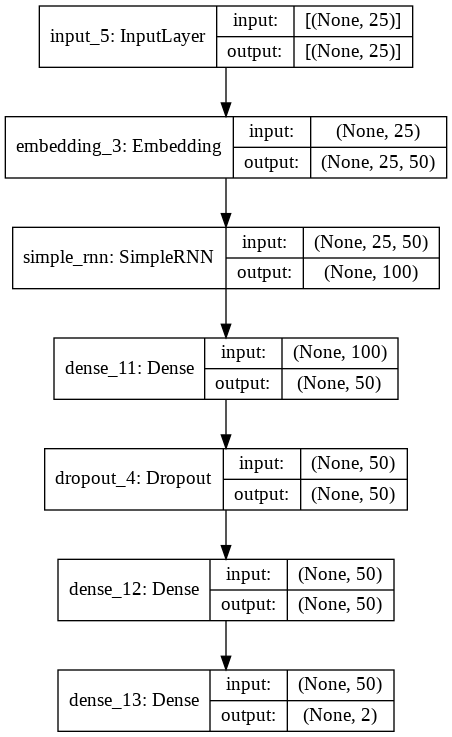

In [34]:
model_name = "RNN_model_1st_lvl"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(RNN_model_1st_lvl, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


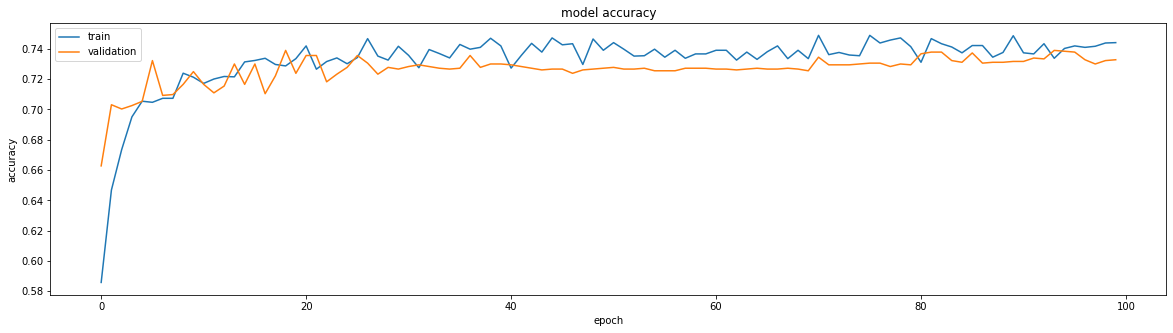

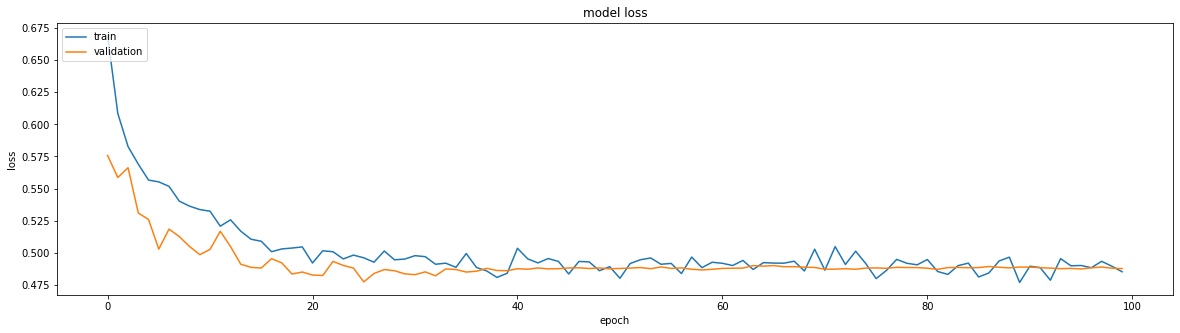

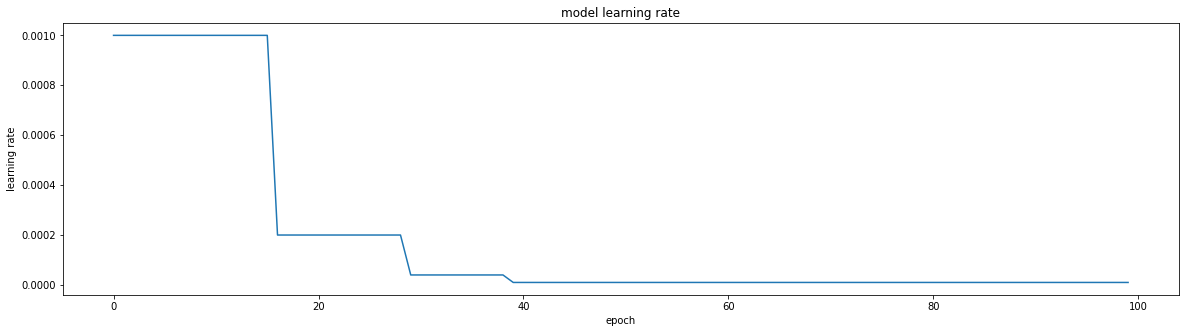

In [35]:
print(RNN_model_1st_lvl_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_model_1st_lvl_history.history['accuracy'])
plt.plot(RNN_model_1st_lvl_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_model_1st_lvl_history.history['loss'])
plt.plot(RNN_model_1st_lvl_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_model_1st_lvl_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [36]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in RNN_model_1st_lvl.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),RNN_model_1st_lvl.predict(x_test),average = 'weighted',multi_class = 'ovr')

two_lvl_model_results_data = pd.DataFrame([["RNN 1st Level",RNN_model_1st_lvl_history.history['accuracy'][-1],RNN_model_1st_lvl_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
two_lvl_model_results_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1317
           1       0.67      0.85      0.75      1233

    accuracy                           0.72      2550
   macro avg       0.74      0.73      0.72      2550
weighted avg       0.74      0.72      0.72      2550



Model Name  train_accuracy  ...  train_time  test_time
0  RNN 1st Level        0.744058  ...  476.172104   0.536243

[1 rows x 11 columns]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1317
           1       0.67      0.85      0.75      1233

    accuracy                           0.72      2550
   macro avg       0.74      0.73      0.72      2550
weighted avg       0.74      0.72      0.72      2550



In [38]:
# 2-level model

y_train_non_one_hot = np.argmax(y_train,axis = 1)
y_test_non_one_hot = np.argmax(y_test,axis = 1)

x_train_2nd_level = np.asarray([x_train[j,:] for j,i in enumerate(y_train_non_one_hot) if i==0])
y_train_2nd_level = to_categorical(np.asarray([np.array(y_multi_lvl_train)[j] for j,i in enumerate(y_train_non_one_hot) if i==0]))
x_train_2nd_level.shape
y_train_2nd_level.shape

x_test_2nd_level = np.asarray([x_test[j,:] for j,i in enumerate(y_test_non_one_hot) if i==0])
y_test_2nd_level = to_categorical(np.asarray([np.array(y_multi_lvl_test)[j] for j,i in enumerate(y_test_non_one_hot) if i==0]))
x_test_2nd_level.shape
y_test_2nd_level.shape

#Simple RNN model
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical



input = Input(shape = (x_train_2nd_level.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)

X = SimpleRNN(100, return_sequences=False, dropout = 0.4)(embeddings)

X = Dense(50, activation='relu')(X)
X = Dropout(0.3)(X)

X = Dense(y_train_2nd_level.shape[1], activation='softmax')(X)

RNN_model_2nd_level = Model(inputs=input, outputs=X)

Adam = tf.keras.optimizers.Adam()
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr # I use ._decayed_lr method instead of .lr
    return lr

lr_metric = get_lr_metric(Adam)

RNN_model_2nd_level.compile(optimizer= Adam, loss='categorical_crossentropy', metrics=['accuracy',lr_metric])
RNN_model_2nd_level.summary()

#Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=0.00001, min_delta = 0.0001,verbose = 1)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/RNN_model_2nd_level.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
RNN_model_2nd_level_history = RNN_model_2nd_level.fit(x_train_2nd_level, y_train_2nd_level, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 25)                1275      
Total params: 545,875
Trainable params: 21,425
Non-trainable params: 524,450
________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


35/35 [==============================] - 3s 45ms/step - loss: 3.2501 - accuracy: 0.0673 - lr: 0.0010 - val_loss: 2.6521 - val_accuracy: 0.2367 - val_lr: 0.0010
Epoch 2/100
35/35 [==============================] - 1s 37ms/step - loss: 2.8031 - accuracy: 0.1868 - lr: 0.0010 - val_loss: 2.4965 - val_accuracy: 0.2601 - val_lr: 0.0010
Epoch 3/100
35/35 [==============================] - 1s 37ms/step - loss: 2.6591 - accuracy: 0.2223 - lr: 0.0010 - val_loss: 2.4285 - val_accuracy: 0.2793 - val_lr: 0.0010
Epoch 4/100
35/35 [==============================] - 1s 35ms/step - loss: 2.5765 - accuracy: 0.2259 - lr: 0.0010 - val_loss: 2.3876 - val_accuracy: 0.2836 - val_lr: 0.0010
Epoch 5/100
35/35 [==============================] - 1s 36ms/step - loss: 2.5372 - accuracy: 0.2534 - lr: 0.0010 - val_loss: 2.3562 - val_accuracy: 0.2889 - val_lr: 0.0010
Epoch 6/100
35/35 [==============================] - 1s 37ms/step - loss: 2.4996 - accuracy: 0.2499 - lr: 0.0010 - val_loss: 2.3143 - val_accuracy: 0.30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


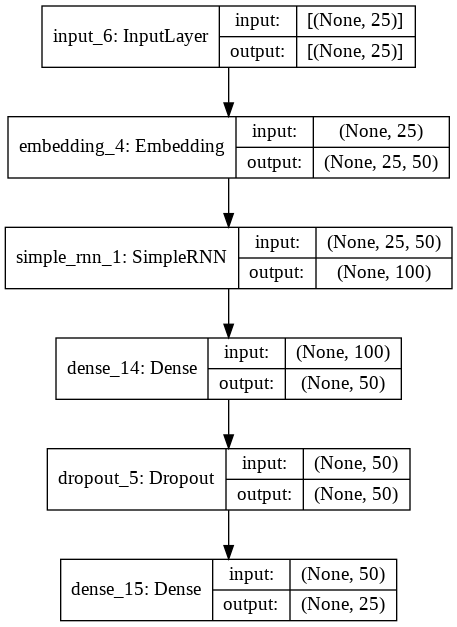

In [39]:
model_name = "RNN_model_2nd_level"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(RNN_model_2nd_level, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'lr', 'val_loss', 'val_accuracy', 'val_lr'])


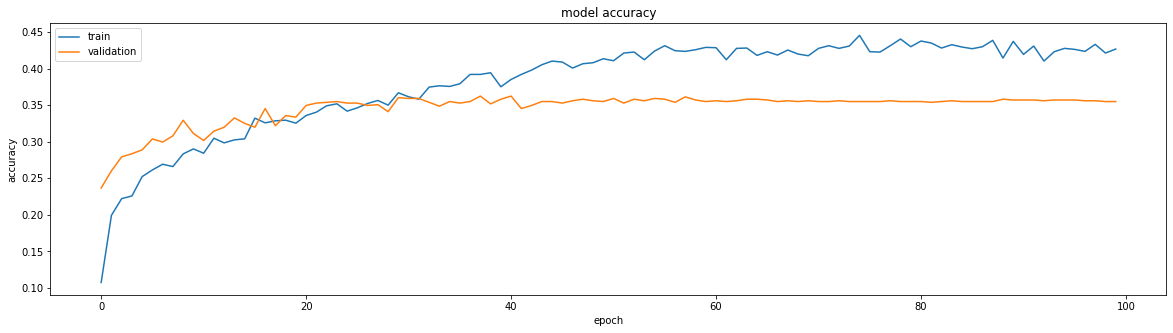

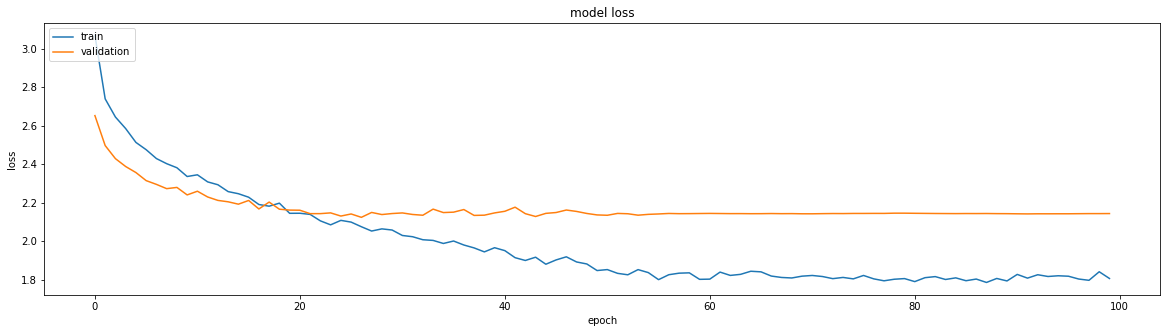

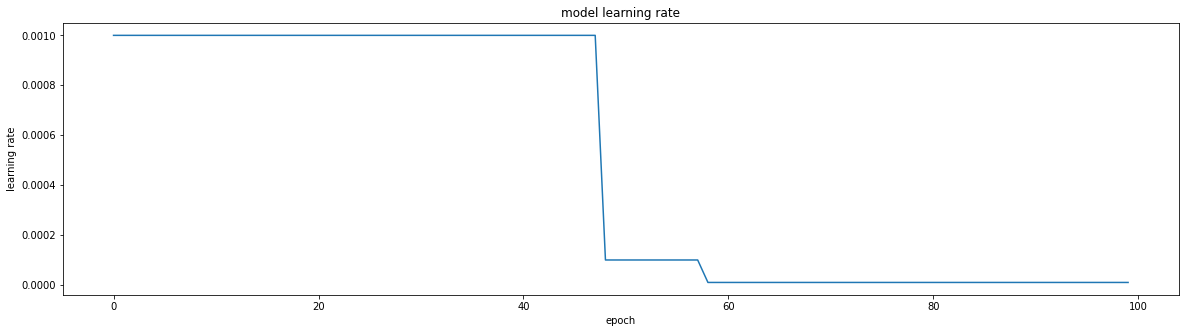

In [40]:
print(RNN_model_2nd_level_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_model_2nd_level_history.history['accuracy'])
plt.plot(RNN_model_2nd_level_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_model_2nd_level_history.history['loss'])
plt.plot(RNN_model_2nd_level_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(RNN_model_2nd_level_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [65]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in RNN_model_2nd_level.predict(x_test_2nd_level)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test_2nd_level]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(y_test_2nd_level[:,1:],RNN_model_2nd_level.predict(x_test_2nd_level)[:,1:],average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["RNN 2nd Level",RNN_model_2nd_level_history.history['accuracy'][-1],RNN_model_2nd_level_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
two_lvl_model_results_data = two_lvl_model_results_data.append(df2, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           1       0.05      0.01      0.02        71
           2       0.28      0.38      0.32        87
           3       0.18      0.24      0.21        58
           4       0.21      0.15      0.18        33
           5       0.40      0.70      0.51       192
           6       0.00      0.00      0.00        24
           7       0.69      0.51      0.59       203
           8       0.14      0.14      0.14        81
           9       0.30      0.36      0.33        78
          10       0.20      0.20      0.20        45
          11       0.00      0.00      0.00        26
          12       0.10      0.12      0.11        25
          13       0.19      0.13      0.15        23
          14       0.11      0.27      0.15        48
          15       0.29      0.05      0.09        38
          16       0.49      0.81      0.61        78
          17       0.00      0.00      0.00        35
          18       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
two_lvl_model_results_data

Model Name  train_accuracy  ...  train_time  test_time
0  RNN 1st Level        0.744058  ...  476.172104   0.536243
1  RNN 2nd Level        0.426874  ...  202.022942   0.227664

[2 rows x 11 columns]

In [67]:
start_time = time.clock()
y_pred_1 = RNN_model_1st_lvl.predict(x_test)
y_pred_1_class = np.argmax(y_pred_1,axis = 1)
y_pred_1_class

x_test_remaining = np.asarray([x_test[j,:] for j,i in enumerate(y_pred_1_class) if i==0])
y_test_remaining = np.asarray([np.array(y_multi_lvl_test)[j] for j,i in enumerate(y_pred_1_class) if i==0])

y_pred_remaining = RNN_model_2nd_level.predict(x_test_remaining)
y_pred_remaining_class = np.argmax(y_pred_remaining,axis = 1)
y_pred_remaining_class

j = 0
y_pred = []
for i in y_pred_1_class:
  if i==1:
    y_pred.append(0)

  else:
    y_pred.append(y_pred_remaining_class[j])
    j+=1
    
y_pred = np.array(y_pred)
test_time = time.clock()-start_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [68]:
y_test_pred = y_pred
y_test_unencoded = y_multi_lvl_test
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),to_categorical(y_test_pred),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["RNN 2-Level combined model",np.NaN,np.NaN, acc,precision,recall, f1score, AUC, cohen_kappa, np.NaN, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
two_lvl_model_results_data = two_lvl_model_results_data.append(df2, ignore_index = True)
two_lvl_model_results_data

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1233
           1       0.00      0.00      0.00        71
           2       0.25      0.17      0.21        87
           3       0.12      0.10      0.11        58
           4       0.11      0.06      0.08        33
           5       0.39      0.67      0.49       192
           6       0.00      0.00      0.00        24
           7       0.71      0.50      0.59       203
           8       0.11      0.10      0.10        81
           9       0.22      0.18      0.20        78
          10       0.20      0.18      0.19        45
          11       0.00      0.00      0.00        26
          12       0.04      0.04      0.04        25
          13       0.11      0.09      0.10        23
          14       0.06      0.02      0.03        48
          15       0.33      0.03      0.05        38
          16       0.36      0.22      0.27        78
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Name  train_accuracy  ...  train_time  test_time
0               RNN 1st Level        0.744058  ...  476.172104   0.536243
1               RNN 2nd Level        0.426874  ...  202.022942   0.227664
2  RNN 2-Level combined model             NaN  ...         NaN   0.593203

[3 rows x 11 columns]

# **2-level model using Bi-directional LSTM and trainable GloVe**

In [69]:
embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(100, return_sequences=False,dropout = 0.4))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='sigmoid')(X)

model_bi_LSTM2_1st_lvl = Model(inputs=input, outputs=X)
model_bi_LSTM2_1st_lvl.summary()
model_bi_LSTM2_1st_lvl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/model_bi_LSTM2_1st_lvl.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
model_bi_LSTM2_1st_lvl_history = model_bi_LSTM2_1st_lvl.fit(x_train, y_train, batch_size=64, epochs=50, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               120800    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 102       
Total params: 655,402
Trainable params: 130,952
Non-trainable params: 524,450
_______________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


66/66 [==============================] - 6s 35ms/step - loss: 0.6314 - accuracy: 0.6316 - val_loss: 0.5167 - val_accuracy: 0.7204
Epoch 2/50
66/66 [==============================] - 1s 22ms/step - loss: 0.5153 - accuracy: 0.7424 - val_loss: 0.4605 - val_accuracy: 0.7647
Epoch 3/50
66/66 [==============================] - 1s 21ms/step - loss: 0.4624 - accuracy: 0.7575 - val_loss: 0.4374 - val_accuracy: 0.7798
Epoch 4/50
66/66 [==============================] - 1s 22ms/step - loss: 0.4453 - accuracy: 0.7768 - val_loss: 0.4236 - val_accuracy: 0.7910
Epoch 5/50
66/66 [==============================] - 1s 21ms/step - loss: 0.4210 - accuracy: 0.7897 - val_loss: 0.4207 - val_accuracy: 0.7866
Epoch 6/50
66/66 [==============================] - 1s 21ms/step - loss: 0.4292 - accuracy: 0.7955 - val_loss: 0.4211 - val_accuracy: 0.7899
Epoch 7/50
66/66 [==============================] - 1s 21ms/step - loss: 0.4027 - accuracy: 0.8072 - val_loss: 0.4083 - val_accuracy: 0.7989
Epoch 8/50
66/66 [======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


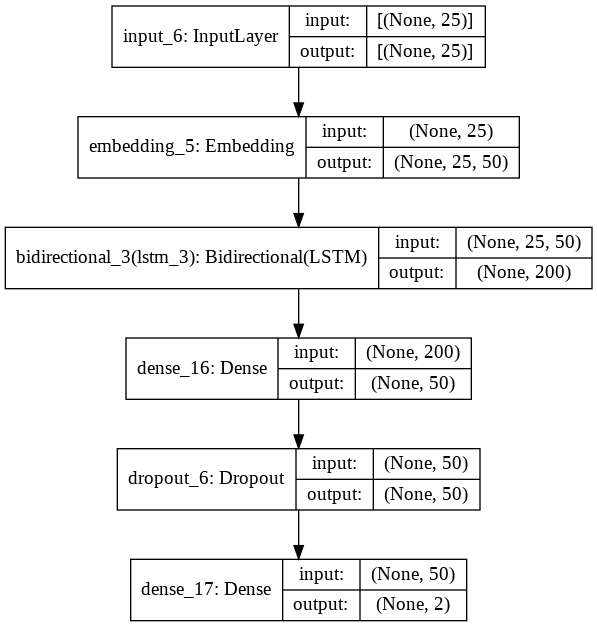

In [70]:
model_name = "model_bi_LSTM2_1st_lvl"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM2_1st_lvl, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


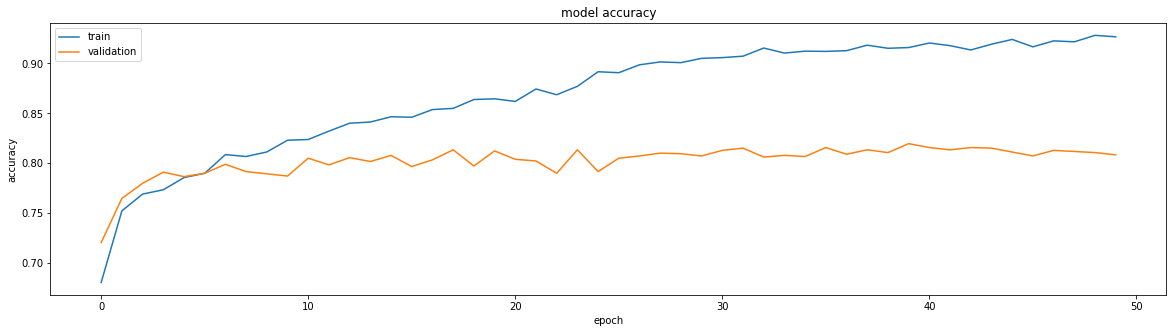

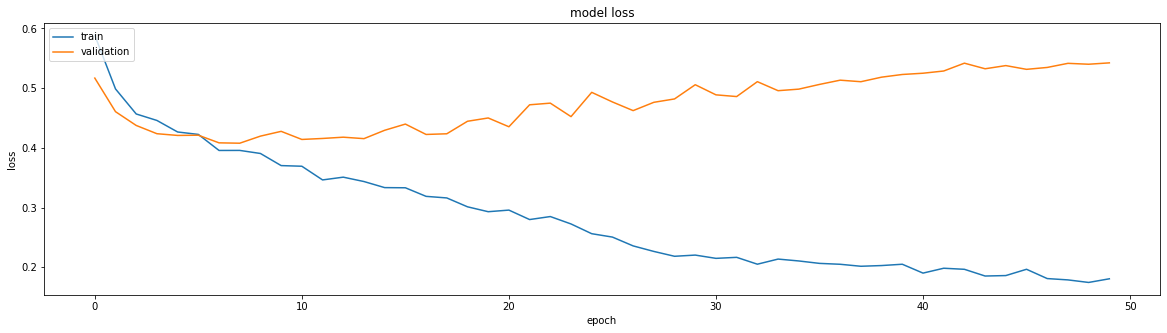

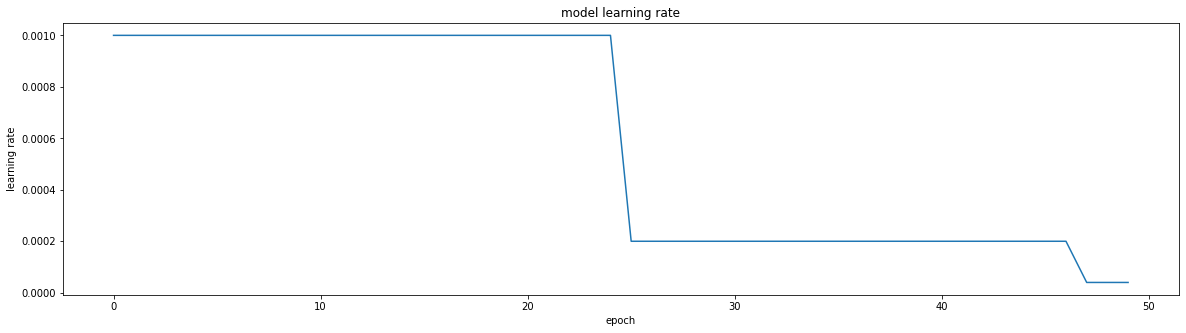

In [71]:
print(model_bi_LSTM2_1st_lvl_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_bi_LSTM2_1st_lvl_history.history['accuracy'])
plt.plot(model_bi_LSTM2_1st_lvl_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_bi_LSTM2_1st_lvl_history.history['loss'])
plt.plot(model_bi_LSTM2_1st_lvl_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_bi_LSTM2_1st_lvl_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [72]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM2_1st_lvl.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(y_test_2nd_level[:,1:],RNN_model_2nd_level.predict(x_test_2nd_level)[:,1:],average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["LSTM Bi-directional & trainable GloVe 1st Level",model_bi_LSTM2_1st_lvl_history.history['accuracy'][-1],model_bi_LSTM2_1st_lvl_history.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])

two_lvl_model_results_data = two_lvl_model_results_data.append(df2, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1317
           1       0.78      0.85      0.81      1233

    accuracy                           0.81      2550
   macro avg       0.81      0.81      0.81      2550
weighted avg       0.82      0.81      0.81      2550



In [74]:
input = Input(shape = (x_train_2nd_level.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)

X = Bidirectional(LSTM(100, return_sequences=False,dropout = 0.4,recurrent_dropout=0.3))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_train_2nd_level.shape[1], activation='softmax')(X)

model_bi_LSTM2_2nd_lvl = Model(inputs=input, outputs=X)
model_bi_LSTM2_2nd_lvl.summary()
model_bi_LSTM2_2nd_lvl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001,verbose = 1)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/model_bi_LSTM2_2nd_lvl.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
model_bi_LSTM2_2nd_lvl_history = model_bi_LSTM2_2nd_lvl.fit(x_train_2nd_level, y_train_2nd_level, batch_size=64, epochs=50, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               120800    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 25)                1275      
Total params: 656,575
Trainable params: 132,125
Non-trainable params: 524,450
_______________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


35/35 [==============================] - 15s 273ms/step - loss: 3.1340 - accuracy: 0.1006 - val_loss: 2.6718 - val_accuracy: 0.1663
Epoch 2/50
35/35 [==============================] - 9s 267ms/step - loss: 2.6886 - accuracy: 0.1898 - val_loss: 2.3759 - val_accuracy: 0.2761
Epoch 3/50
35/35 [==============================] - 9s 260ms/step - loss: 2.4568 - accuracy: 0.2726 - val_loss: 2.2819 - val_accuracy: 0.3028
Epoch 4/50
35/35 [==============================] - 9s 267ms/step - loss: 2.3496 - accuracy: 0.2968 - val_loss: 2.2048 - val_accuracy: 0.3358
Epoch 5/50
35/35 [==============================] - 9s 262ms/step - loss: 2.3028 - accuracy: 0.2971 - val_loss: 2.1245 - val_accuracy: 0.3465
Epoch 6/50
35/35 [==============================] - 9s 259ms/step - loss: 2.2131 - accuracy: 0.3245 - val_loss: 2.0977 - val_accuracy: 0.3486
Epoch 7/50
35/35 [==============================] - 9s 263ms/step - loss: 2.1102 - accuracy: 0.3351 - val_loss: 2.0542 - val_accuracy: 0.3550
Epoch 8/50
35/35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


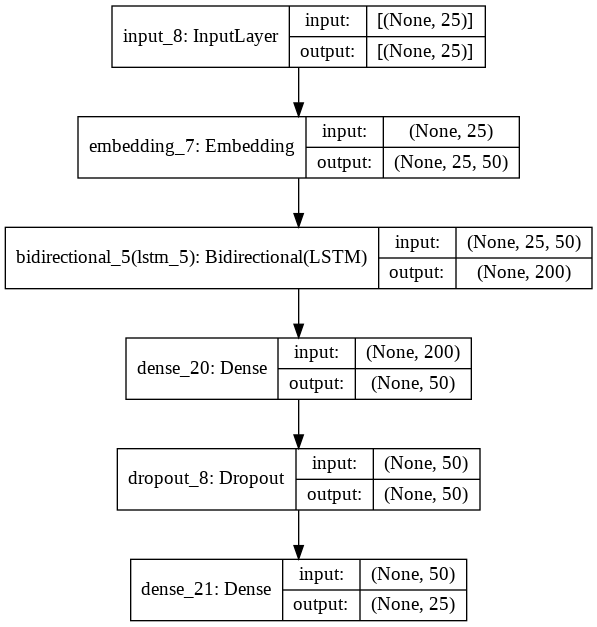

In [75]:
model_name = "model_bi_LSTM2_2nd_lvl"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM2_2nd_lvl, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


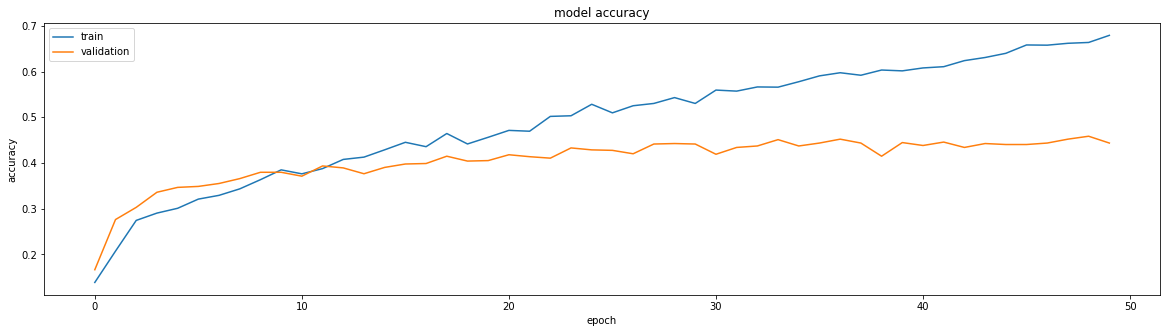

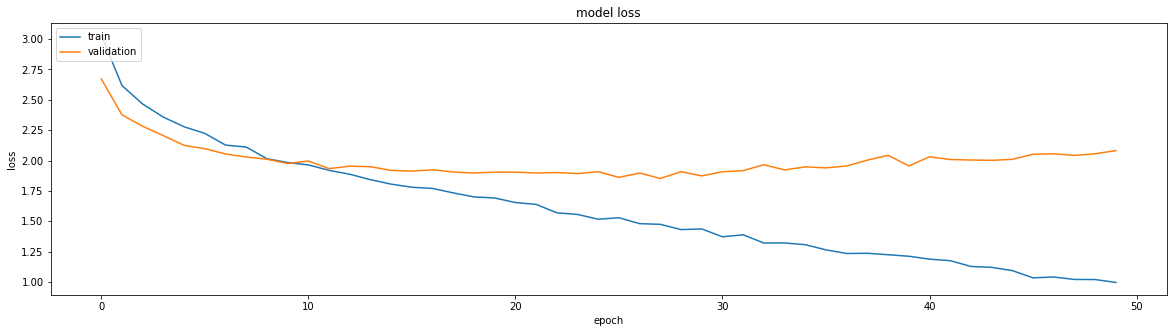

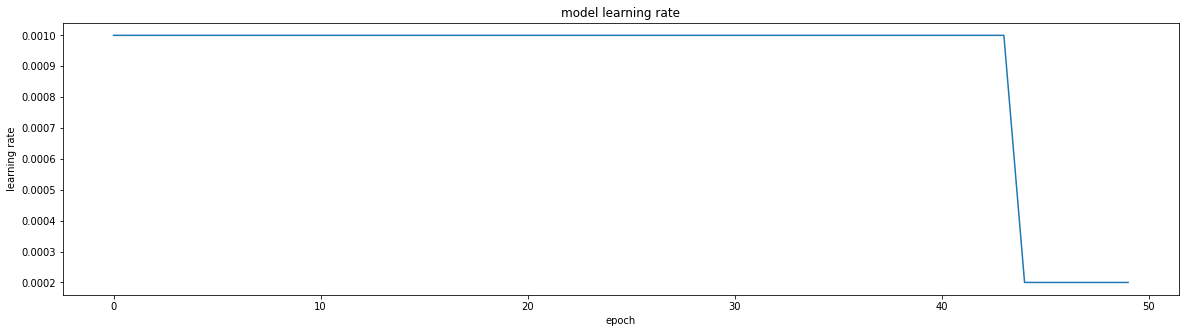

In [76]:
print(model_bi_LSTM2_2nd_lvl_history.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_bi_LSTM2_2nd_lvl_history.history['accuracy'])
plt.plot(model_bi_LSTM2_2nd_lvl_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_bi_LSTM2_2nd_lvl_history.history['loss'])
plt.plot(model_bi_LSTM2_2nd_lvl_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(model_bi_LSTM2_2nd_lvl_history.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [78]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in RNN_model_2nd_level.predict(x_test_2nd_level)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test_2nd_level]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(y_test_2nd_level[:,1:],RNN_model_2nd_level.predict(x_test_2nd_level)[:,1:],average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["LSTM Bi-directional & trainable GloVe 2nd Level",RNN_model_2nd_level_history.history['accuracy'][-1],RNN_model_2nd_level_history.history['val_accuracy'][-1],  acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
two_lvl_model_results_data = two_lvl_model_results_data.append(df2, ignore_index = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-de

              precision    recall  f1-score   support

           1       0.05      0.01      0.02        71
           2       0.28      0.38      0.32        87
           3       0.18      0.24      0.21        58
           4       0.21      0.15      0.18        33
           5       0.40      0.70      0.51       192
           6       0.00      0.00      0.00        24
           7       0.69      0.51      0.59       203
           8       0.14      0.14      0.14        81
           9       0.30      0.36      0.33        78
          10       0.20      0.20      0.20        45
          11       0.00      0.00      0.00        26
          12       0.10      0.12      0.11        25
          13       0.19      0.13      0.15        23
          14       0.11      0.27      0.15        48
          15       0.29      0.05      0.09        38
          16       0.49      0.81      0.61        78
          17       0.00      0.00      0.00        35
          18       0.00    

In [79]:
#Running both models combined on test data 
start_time = time.clock()
y_pred_1 = model_bi_LSTM2_1st_lvl.predict(x_test)
y_pred_1_class = np.argmax(y_pred_1,axis = 1)
y_pred_1_class

x_test_remaining = np.asarray([x_test[j,:] for j,i in enumerate(y_pred_1_class) if i==0])
y_test_remaining = np.asarray([np.array(y_multi_lvl_test)[j] for j,i in enumerate(y_pred_1_class) if i==0])

y_pred_remaining = model_bi_LSTM2_2nd_lvl.predict(x_test_remaining)
y_pred_remaining_class = np.argmax(y_pred_remaining,axis = 1)
y_pred_remaining_class

j = 0
y_pred = []
for i in y_pred_1_class:
  if i==1:
    y_pred.append(0)

  else:
    y_pred.append(y_pred_remaining_class[j])
    j+=1
    
y_pred = np.array(y_pred)
test_time = time.clock()-start_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [80]:
y_test_pred = y_pred
y_test_unencoded = y_multi_lvl_test
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),to_categorical(y_test_pred),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["LSTM Bi-directional & trainable GloVe 2-Level combined model",np.NaN,np.NaN,  acc,precision,recall, f1score, AUC, cohen_kappa, np.NaN, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
two_lvl_model_results_data = two_lvl_model_results_data.append(df2, ignore_index = True)
two_lvl_model_results_data

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1233
           1       0.25      0.11      0.16        71
           2       0.43      0.38      0.40        87
           3       0.26      0.21      0.23        58
           4       0.22      0.18      0.20        33
           5       0.47      0.67      0.55       192
           6       0.80      0.17      0.28        24
           7       0.76      0.55      0.63       203
           8       0.29      0.28      0.29        81
           9       0.38      0.38      0.38        78
          10       0.50      0.29      0.37        45
          11       0.17      0.23      0.19        26
          12       0.16      0.16      0.16        25
          13       0.35      0.52      0.42        23
          14       0.20      0.29      0.24        48
          15       0.08      0.03      0.04        38
          16       0.57      0.74      0.64        78
          17       0.20    

Model Name  ...  test_time
0                                      RNN 1st Level  ...   0.536243
1                                      RNN 2nd Level  ...   0.227664
2                         RNN 2-Level combined model  ...   0.593203
3    LSTM Bi-directional & trainable GloVe 1st Level  ...   1.188646
4    LSTM Bi-directional & trainable GloVe 2nd Level  ...   0.219616
5  LSTM Bi-directional & trainable GloVe 2-Level ...  ...   1.630847

[6 rows x 11 columns]

In [83]:
two_lvl_model_results_data.to_csv("two_lvl_model_results_data.csv")

In [81]:
#Simple RNN model using GloVe embeddings trained on Wikipedia 6B
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample, shuffle

vocab_len = len(dataset_vocab)+1

def Use_which_embedding(name):
  if name.lower() == "glove":
    #GloVe embedding matrix
    embed_vector_len = embed_matrix.shape[1]
    print(embed_vector_len)
    embed_matrix_init_weights = embed_matrix
  elif name.lower() == "word2vec":
    #Wor2Vec embedding matrix
    embed_vector_len = embed_matrix_word2vec.shape[1]
    embed_matrix_init_weights = embed_matrix_word2vec
    print(embed_vector_len)
  return embed_vector_len, embed_matrix_init_weights

#MENTION WHICH EMBEDDING YOU WANT TO USE
embed_vector_len, embed_matrix_init_weights = Use_which_embedding("glove")


x_train_0,x_test_0,y_train_0,y_test_0 = train_test_split(df_clean,y,test_size = 0.3, random_state = 123)

#RESAMPLING
df_train_0 = x_train_0
df_train_0["y"] = y_train_0

df_train = df_train_0[0:0]

for grp in df_train_0['Assignment group'].unique():
    if grp != "GRP_00":
      itTicketGrpDF = df_train_0[df_train_0['Assignment group'] == grp]
      resampled = resample(itTicketGrpDF, replace=True, n_samples=int(500), random_state=123)
      df_train = df_train.append(resampled)
    else:
      resampled = df_train_0[df_train_0['Assignment group'] == grp]
      df_train = df_train.append(resampled)
df_train = shuffle(df_train)



#*******************************
maxLen = 25
def create_x(dataset_name):
  import tensorflow as tf
  x_input_RNN = []
  length = 0

  Embedding_to_use = "word2vec"

  for i in list(dataset_name.desc2_or_shrt_desc2.apply(word_tokenize)):
      length = max(len(i),length)
      if len(i) >0:
        l1 = []
        for j in i:
          #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
          if Embedding_to_use.lower() == "word2vec" or (Embedding_to_use.lower() == "glove" and j not in zero_embed_words):
            l1.append(dataset_dict_w2i[j])
        x_input_RNN.append(l1)
      else:
        x_input_RNN.append([len(dataset_vocab)]) 
  # Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

  x_len = [len(i) for i in x_input_RNN]
  print("Different sentences have different length. Here are the stats: Mean:{} \nSTD:{} \nMedian:{} \nQuantiles-[10,25,50,75,90,95,99,max]: {}"
        .format(np.mean(np.array(x_len)),
        np.std(np.array(x_len)),
        np.median(np.array(x_len)),
        np.quantile(np.array(x_len),[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
                )
        )
  #Given the above distribution, we will set the max length to 100 words. 
  #Keeping the value to be 891 will slow down model development and add no incremental value in

  x_input_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')
  return x_input_RNN


x_train = create_x(df_train)
y_train = to_categorical(df_train.y)

'''
x_train_01 = create_x(x_train_0)
#y_train = to_categorical(y_train_0)


from imblearn.over_sampling import SMOTE 
strategy = {i:300 for i in range(len(y.unique()))}
strategy[0] = 3500
strategy[5] = 705
strategy[7] = 661
sm = SMOTE(sampling_strategy=strategy,random_state=42)

x_train, y_train_01 = sm.fit_resample(x_train_01, y_train_0)
y_train = to_categorical(y_train_01)
x_train,y_train = shuffle(x_train,y_train)
'''

x_test = create_x(x_test_0)
y_test = to_categorical(y_test_0)

50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Different sentences have different length. Here are the stats: Mean:20.030423637344846 
STD:48.56397441900088 
Median:10.0 
Quantiles-[10,25,50,75,90,95,99,max]: [  3.     5.    10.    19.    39.    62.   140.85 891.  ]
Different sentences have different length. Here are the stats: Mean:16.50313725490196 
STD:36.23697318281081 
Median:7.0 
Quantiles-[10,25,50,75,90,95,99,max]: [  3.     4.     7.    17.    33.    59.1  110.59 738.  ]


In [84]:
#Bi-directional LSTM model on pre-trained GloVe and resampled data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_train.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(50, return_sequences=False,dropout = 0.1))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_train.shape[1], activation='softmax')(X)

model_bi_LSTM3 = Model(inputs=input, outputs=X)
model_bi_LSTM3.summary()
model_bi_LSTM3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_bi_model3_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_bi_history3 = model_bi_LSTM3.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 25)]              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 25, 50)            524450    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100)               40400     
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 25)                1275      
Total params: 571,175
Trainable params: 46,725
Non-trainable params: 524,450
_______________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


163/163 [==============================] - 7s 24ms/step - loss: 3.0530 - accuracy: 0.1534 - val_loss: 2.4943 - val_accuracy: 0.2997
Epoch 2/100
163/163 [==============================] - 3s 18ms/step - loss: 2.4383 - accuracy: 0.3063 - val_loss: 2.0714 - val_accuracy: 0.4224
Epoch 3/100
163/163 [==============================] - 3s 19ms/step - loss: 2.0681 - accuracy: 0.4008 - val_loss: 1.8045 - val_accuracy: 0.4739
Epoch 4/100
163/163 [==============================] - 3s 19ms/step - loss: 1.8010 - accuracy: 0.4674 - val_loss: 1.6093 - val_accuracy: 0.5211
Epoch 5/100
163/163 [==============================] - 3s 19ms/step - loss: 1.6253 - accuracy: 0.5099 - val_loss: 1.4647 - val_accuracy: 0.5724
Epoch 6/100
163/163 [==============================] - 3s 19ms/step - loss: 1.4553 - accuracy: 0.5592 - val_loss: 1.3381 - val_accuracy: 0.6102
Epoch 7/100
163/163 [==============================] - 3s 19ms/step - loss: 1.3382 - accuracy: 0.5995 - val_loss: 1.2219 - val_accuracy: 0.6412
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


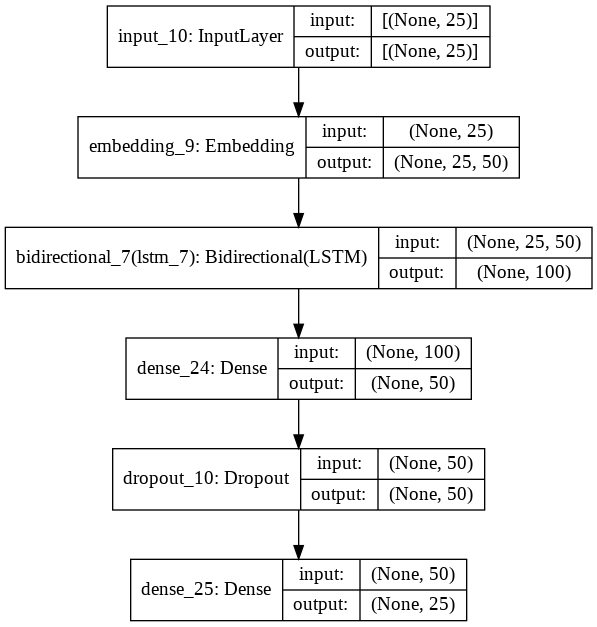

In [85]:
model_name = "model_bi_LSTM3"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM3, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


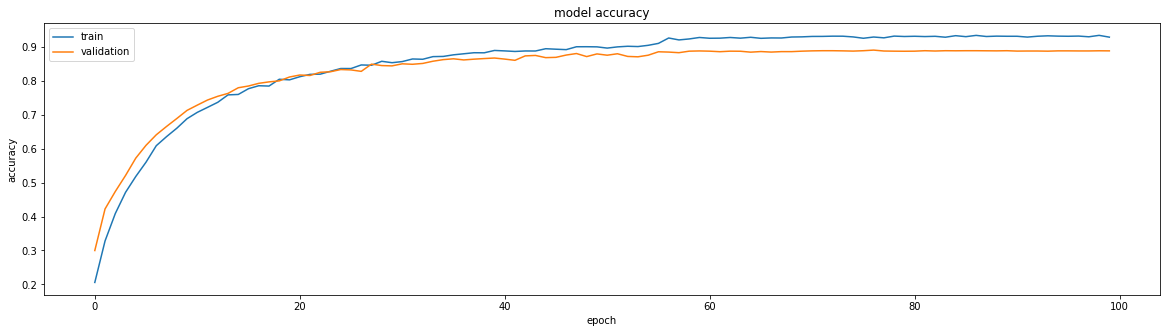

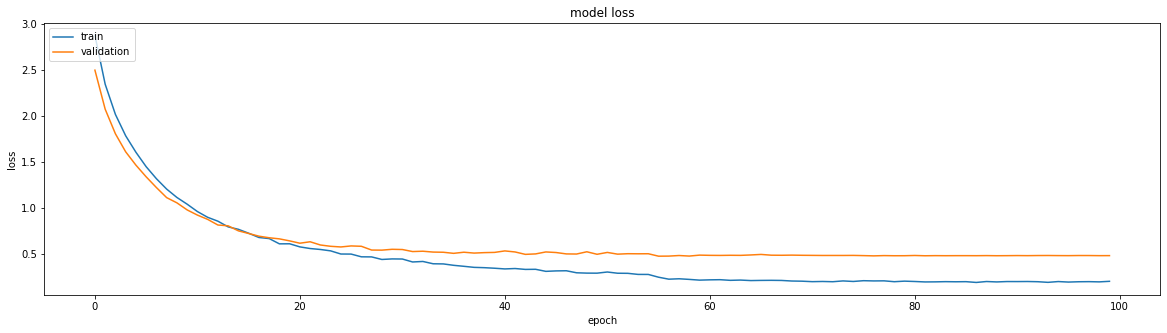

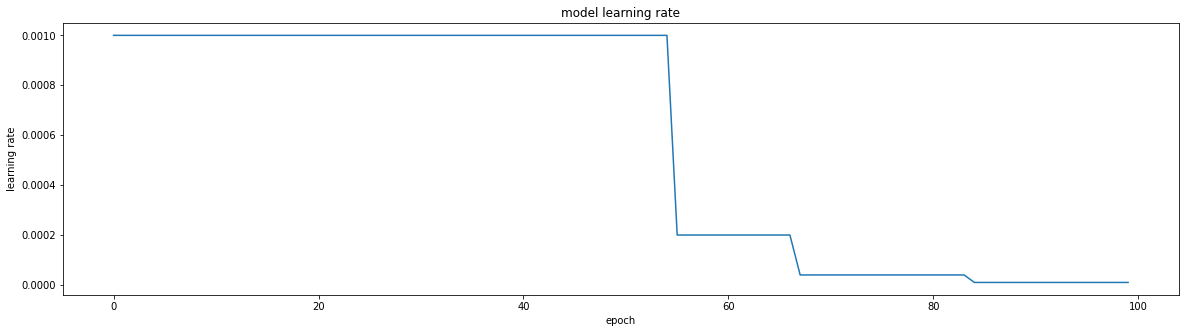

In [86]:
print(LSTM_bi_history3.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history3.history['accuracy'])
plt.plot(LSTM_bi_history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history3.history['loss'])
plt.plot(LSTM_bi_history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history3.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [87]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM3.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_bi_LSTM2.predict(x_test),average = 'weighted',multi_class = 'ovr')

model_results_data_oversampled = pd.DataFrame([["Bidirectional LSTM with 50d GloVe and trainable embedding and resampling",LSTM_bi_history3.history['accuracy'][-1],LSTM_bi_history3.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data_oversampled 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1233
           1       0.29      0.21      0.24        71
           2       0.43      0.36      0.39        87
           3       0.26      0.26      0.26        58
           4       0.34      0.33      0.34        33
           5       0.52      0.68      0.59       192
           6       0.53      0.33      0.41        24
           7       0.83      0.47      0.60       203
           8       0.24      0.26      0.25        81
           9       0.52      0.45      0.48        78
          10       0.43      0.36      0.39        45
          11       0.22      0.19      0.20        26
          12       0.27      0.28      0.27        25
          13       0.21      0.26      0.23        23
          14       0.12      0.12      0.12        48
          15       0.23      0.13      0.17        38
          16       0.68      0.72      0.70        78
          17       0.17    

Model Name  ...  test_time
0  Bidirectional LSTM with 50d GloVe and trainabl...  ...   1.151533

[1 rows x 11 columns]

In [88]:
#Simple RNN model using GloVe embeddings trained on Wikipedia 6B
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample, shuffle

vocab_len = len(dataset_vocab)+1

def Use_which_embedding(name):
  if name.lower() == "glove":
    #GloVe embedding matrix
    embed_vector_len = embed_matrix.shape[1]
    print(embed_vector_len)
    embed_matrix_init_weights = embed_matrix
  elif name.lower() == "word2vec":
    #Wor2Vec embedding matrix
    embed_vector_len = embed_matrix_word2vec.shape[1]
    embed_matrix_init_weights = embed_matrix_word2vec
    print(embed_vector_len)
  return embed_vector_len, embed_matrix_init_weights

#MENTION WHICH EMBEDDING YOU WANT TO USE
embed_vector_len, embed_matrix_init_weights = Use_which_embedding("glove")


x_train_0,x_test_0,y_train_0,y_test_0 = train_test_split(df_clean,y,test_size = 0.3, random_state = 123)

'''
#RESAMPLING
df_train_0 = x_train_0
df_train_0["y"] = y_train_0

df_train = df_train_0[0:0]

for grp in df_train_0['Assignment group'].unique():
    if grp != "GRP_00":
      itTicketGrpDF = df_train_0[df_train_0['Assignment group'] == grp]
      resampled = resample(itTicketGrpDF, replace=True, n_samples=int(500), random_state=123)
      df_train = df_train.append(resampled)
    else:
      resampled = df_train_0[df_train_0['Assignment group'] == grp]
      df_train = df_train.append(resampled)
df_train = shuffle(df_train)
'''


#*******************************
maxLen = 25
def create_x(dataset_name):
  import tensorflow as tf
  x_input_RNN = []
  length = 0

  Embedding_to_use = "word2vec"

  for i in list(dataset_name.desc2_or_shrt_desc2.apply(word_tokenize)):
      length = max(len(i),length)
      if len(i) >0:
        l1 = []
        for j in i:
          #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
          if Embedding_to_use.lower() == "word2vec" or (Embedding_to_use.lower() == "glove" and j not in zero_embed_words):
            l1.append(dataset_dict_w2i[j])
        x_input_RNN.append(l1)
      else:
        x_input_RNN.append([len(dataset_vocab)]) 
  # Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

  x_len = [len(i) for i in x_input_RNN]
  print("Different sentences have different length. Here are the stats: Mean:{} \nSTD:{} \nMedian:{} \nQuantiles-[10,25,50,75,90,95,99,max]: {}"
        .format(np.mean(np.array(x_len)),
        np.std(np.array(x_len)),
        np.median(np.array(x_len)),
        np.quantile(np.array(x_len),[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
                )
        )
  #Given the above distribution, we will set the max length to 100 words. 
  #Keeping the value to be 891 will slow down model development and add no incremental value in

  x_input_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')
  return x_input_RNN

'''
x_train = create_x(df_train)
y_train = to_categorical(df_train.y)

'''
x_train_01 = create_x(x_train_0)
#y_train = to_categorical(y_train_0)


from imblearn.over_sampling import SMOTE 
strategy = {i:500 for i in range(len(y.unique()))}
strategy[0] = 3500
strategy[5] = 705
strategy[7] = 661
sm = SMOTE(sampling_strategy=strategy,random_state=42)

x_train, y_train_01 = sm.fit_resample(x_train_01, y_train_0)
y_train = to_categorical(y_train_01)
x_train,y_train = shuffle(x_train,y_train)


x_test = create_x(x_test_0)
y_test = to_categorical(y_test_0)

50
Different sentences have different length. Here are the stats: Mean:15.975126050420169 
STD:38.36297304191066 
Median:7.0 
Quantiles-[10,25,50,75,90,95,99,max]: [  3.     4.     7.    16.    31.    51.   109.51 891.  ]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (3500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 2824)
  n_samples_majority))
/usr/l

Different sentences have different length. Here are the stats: Mean:16.50313725490196 
STD:36.23697318281081 
Median:7.0 
Quantiles-[10,25,50,75,90,95,99,max]: [  3.     4.     7.    17.    33.    59.1  110.59 738.  ]


In [89]:
#Bi-directional LSTM model on pre-trained GloVe and resampled data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_train.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(50, return_sequences=False,dropout = 0.1))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_train.shape[1], activation='softmax')(X)

model_bi_LSTM4 = Model(inputs=input, outputs=X)
model_bi_LSTM4.summary()
model_bi_LSTM4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_bi_model4_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_bi_history4 = model_bi_LSTM4.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 25)]              0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 25, 50)            524450    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 100)               40400     
_________________________________________________________________
dense_26 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 25)                1275      
Total params: 571,175
Trainable params: 46,725
Non-trainable params: 524,450
_______________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


174/174 [==============================] - 8s 24ms/step - loss: 2.9446 - accuracy: 0.2082 - val_loss: 2.5948 - val_accuracy: 0.2607
Epoch 2/100
174/174 [==============================] - 3s 19ms/step - loss: 2.5549 - accuracy: 0.2662 - val_loss: 2.5114 - val_accuracy: 0.2679
Epoch 3/100
174/174 [==============================] - 3s 18ms/step - loss: 2.4490 - accuracy: 0.2955 - val_loss: 2.4659 - val_accuracy: 0.2979
Epoch 4/100
174/174 [==============================] - 3s 19ms/step - loss: 2.3962 - accuracy: 0.3027 - val_loss: 2.4240 - val_accuracy: 0.3074
Epoch 5/100
174/174 [==============================] - 3s 19ms/step - loss: 2.3385 - accuracy: 0.3160 - val_loss: 2.4246 - val_accuracy: 0.3122
Epoch 6/100
174/174 [==============================] - 3s 18ms/step - loss: 2.3172 - accuracy: 0.3205 - val_loss: 2.4228 - val_accuracy: 0.3166
Epoch 7/100
174/174 [==============================] - 3s 18ms/step - loss: 2.2922 - accuracy: 0.3281 - val_loss: 2.3923 - val_accuracy: 0.3151
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


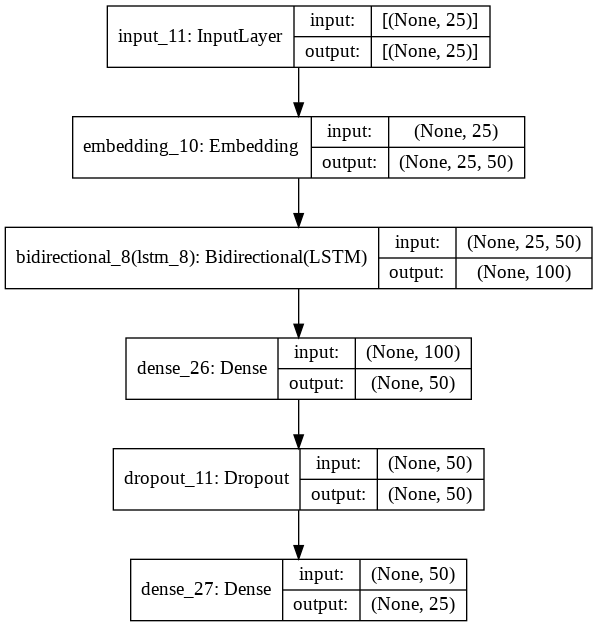

In [90]:
model_name = "model_bi_LSTM4"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM4, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


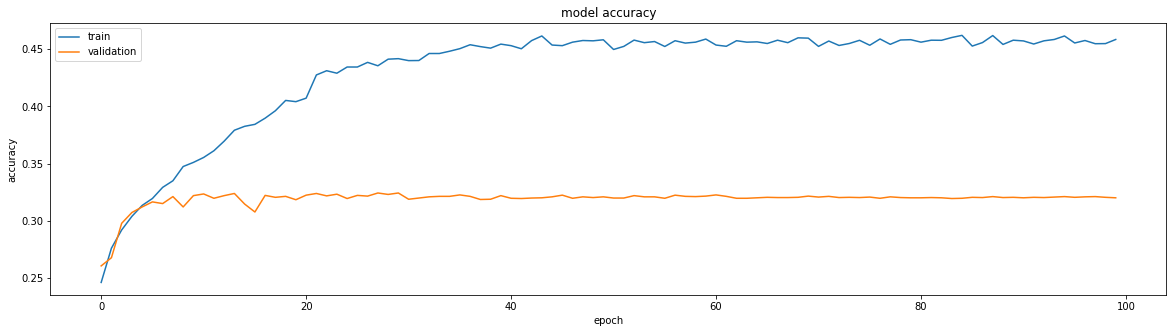

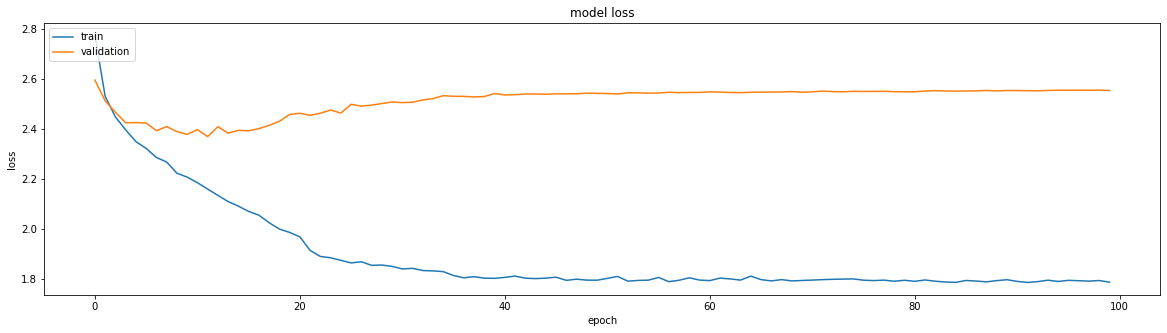

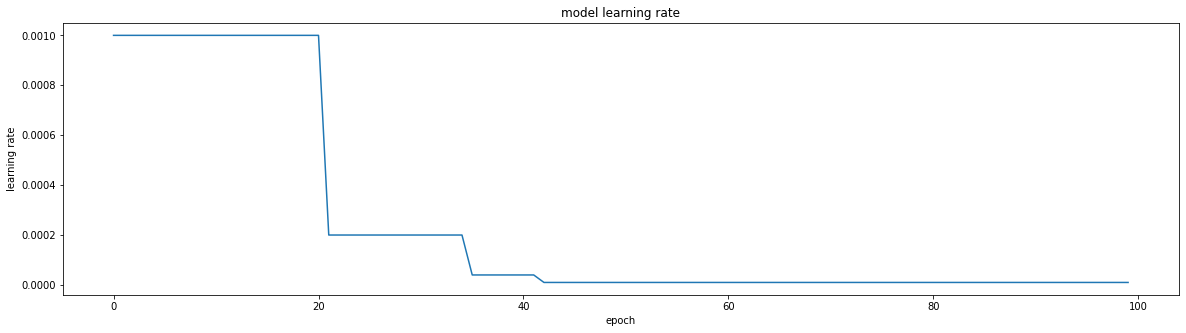

In [91]:
print(LSTM_bi_history4.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history4.history['accuracy'])
plt.plot(LSTM_bi_history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history4.history['loss'])
plt.plot(LSTM_bi_history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history4.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [92]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM4.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_bi_LSTM2.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["Bidirectional LSTM with 50d GloVe and trainable embedding and SMOTE",LSTM_bi_history4.history['accuracy'][-1],LSTM_bi_history4.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data_oversampled = model_results_data_oversampled.append(df2, ignore_index = True)
model_results_data_oversampled

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1233
           1       0.09      0.06      0.07        71
           2       0.50      0.32      0.39        87
           3       0.17      0.10      0.13        58
           4       0.30      0.18      0.23        33
           5       0.48      0.69      0.56       192
           6       0.00      0.00      0.00        24
           7       0.77      0.52      0.62       203
           8       0.21      0.16      0.18        81
           9       0.44      0.33      0.38        78
          10       0.21      0.20      0.21        45
          11       0.08      0.08      0.08        26
          12       0.28      0.20      0.23        25
          13       0.12      0.13      0.12        23
          14       0.12      0.15      0.13        48
          15       0.20      0.03      0.05        38
          16       0.67      0.74      0.70        78
          17       0.20    

Model Name  ...  test_time
0  Bidirectional LSTM with 50d GloVe and trainabl...  ...   1.151533
1  Bidirectional LSTM with 50d GloVe and trainabl...  ...   1.177335

[2 rows x 11 columns]

In [94]:
model_results_data_oversampled.to_csv("model_results_data_oversampled.csv")

# **CODE ENDS HERE**

In [93]:
a2 = pd.dataframe()

AttributeError: ignored

In [ ]:
#Simple RNN model using GloVe embeddings trained on Wikipedia 6B
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample, shuffle

vocab_len = len(dataset_vocab)+1

def Use_which_embedding(name):
  if name.lower() == "glove":
    #GloVe embedding matrix
    embed_vector_len = embed_matrix.shape[1]
    print(embed_vector_len)
    embed_matrix_init_weights = embed_matrix
  elif name.lower() == "word2vec":
    #Wor2Vec embedding matrix
    embed_vector_len = embed_matrix_word2vec.shape[1]
    embed_matrix_init_weights = embed_matrix_word2vec
    print(embed_vector_len)
  return embed_vector_len, embed_matrix_init_weights

#MENTION WHICH EMBEDDING YOU WANT TO USE
embed_vector_len, embed_matrix_init_weights = Use_which_embedding("glove")


x_train_0,x_test_0,y_train_0,y_test_0 = train_test_split(df_clean,y,test_size = 0.3, random_state = 123)

#RESAMPLING
df_train_0 = x_train_0
df_train_0["y"] = y_train_0

df_train = df_train_0[0:0]

for grp in df_train_0['Assignment group'].unique():
    if grp != "GRP_00":
      itTicketGrpDF = df_train_0[df_train_0['Assignment group'] == grp]
      resampled = resample(itTicketGrpDF, replace=True, n_samples=int(500), random_state=123)
      df_train = df_train.append(resampled)
    else:
      resampled = df_train_0[df_train_0['Assignment group'] == grp]
      df_train = df_train.append(resampled)
df_train = shuffle(df_train)



#*******************************
maxLen = 25
def create_x(dataset_name):
  import tensorflow as tf
  x_input_RNN = []
  length = 0

  Embedding_to_use = "word2vec"

  for i in list(dataset_name.desc2_or_shrt_desc2.apply(word_tokenize)):
      length = max(len(i),length)
      if len(i) >0:
        l1 = []
        for j in i:
          #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
          if Embedding_to_use.lower() == "word2vec" or (Embedding_to_use.lower() == "glove" and j not in zero_embed_words):
            l1.append(dataset_dict_w2i[j])
        x_input_RNN.append(l1)
      else:
        x_input_RNN.append([len(dataset_vocab)]) 
  # Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

  x_len = [len(i) for i in x_input_RNN]
  print("Different sentences have different length. Here are the stats: Mean:{} \nSTD:{} \nMedian:{} \nQuantiles-[10,25,50,75,90,95,99,max]: {}"
        .format(np.mean(np.array(x_len)),
        np.std(np.array(x_len)),
        np.median(np.array(x_len)),
        np.quantile(np.array(x_len),[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
                )
        )
  #Given the above distribution, we will set the max length to 100 words. 
  #Keeping the value to be 891 will slow down model development and add no incremental value in

  x_input_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')
  return x_input_RNN


x_train = create_x(df_train)
y_train = to_categorical(df_train.y)

'''
x_train_01 = create_x(x_train_0)
#y_train = to_categorical(y_train_0)


from imblearn.over_sampling import SMOTE 
strategy = {i:300 for i in range(len(y.unique()))}
strategy[0] = 3500
strategy[5] = 705
strategy[7] = 661
sm = SMOTE(sampling_strategy=strategy,random_state=42)

x_train, y_train_01 = sm.fit_resample(x_train_01, y_train_0)
y_train = to_categorical(y_train_01)
x_train,y_train = shuffle(x_train,y_train)
'''

x_test = create_x(x_test_0)
y_test = to_categorical(y_test_0)

In [ ]:
#Bi-directional LSTM model on pre-trained GloVe and resampled data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(50, return_sequences=False,dropout = 0.1))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_bi_LSTM3 = Model(inputs=input, outputs=X)
model_bi_LSTM3.summary()
model_bi_LSTM3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_bi_model3_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_bi_history3 = model_bi_LSTM3.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

In [ ]:
model_name = "model_bi_LSTM3"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM3, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

In [ ]:
print(LSTM_bi_history3.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history3.history['accuracy'])
plt.plot(LSTM_bi_history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history3.history['loss'])
plt.plot(LSTM_bi_history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history3.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [ ]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM3.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_bi_LSTM2.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["Bidirectional LSTM with 50d GloVe and trainable embedding and resampling",LSTM_bi_history3.history['accuracy'][-1],LSTM_bi_history3.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

In [ ]:
#Simple RNN model using GloVe embeddings trained on Wikipedia 6B
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, Input, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample, shuffle

vocab_len = len(dataset_vocab)+1

def Use_which_embedding(name):
  if name.lower() == "glove":
    #GloVe embedding matrix
    embed_vector_len = embed_matrix.shape[1]
    print(embed_vector_len)
    embed_matrix_init_weights = embed_matrix
  elif name.lower() == "word2vec":
    #Wor2Vec embedding matrix
    embed_vector_len = embed_matrix_word2vec.shape[1]
    embed_matrix_init_weights = embed_matrix_word2vec
    print(embed_vector_len)
  return embed_vector_len, embed_matrix_init_weights

#MENTION WHICH EMBEDDING YOU WANT TO USE
embed_vector_len, embed_matrix_init_weights = Use_which_embedding("glove")


x_train_0,x_test_0,y_train_0,y_test_0 = train_test_split(df_clean,y,test_size = 0.3, random_state = 123)

'''
#RESAMPLING
df_train_0 = x_train_0
df_train_0["y"] = y_train_0

df_train = df_train_0[0:0]

for grp in df_train_0['Assignment group'].unique():
    if grp != "GRP_00":
      itTicketGrpDF = df_train_0[df_train_0['Assignment group'] == grp]
      resampled = resample(itTicketGrpDF, replace=True, n_samples=int(500), random_state=123)
      df_train = df_train.append(resampled)
    else:
      resampled = df_train_0[df_train_0['Assignment group'] == grp]
      df_train = df_train.append(resampled)
df_train = shuffle(df_train)
'''


#*******************************
maxLen = 25
def create_x(dataset_name):
  import tensorflow as tf
  x_input_RNN = []
  length = 0

  Embedding_to_use = "word2vec"

  for i in list(dataset_name.desc2_or_shrt_desc2.apply(word_tokenize)):
      length = max(len(i),length)
      if len(i) >0:
        l1 = []
        for j in i:
          #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
          if Embedding_to_use.lower() == "word2vec" or (Embedding_to_use.lower() == "glove" and j not in zero_embed_words):
            l1.append(dataset_dict_w2i[j])
        x_input_RNN.append(l1)
      else:
        x_input_RNN.append([len(dataset_vocab)]) 
  # Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

  x_len = [len(i) for i in x_input_RNN]
  print("Different sentences have different length. Here are the stats: Mean:{} \nSTD:{} \nMedian:{} \nQuantiles-[10,25,50,75,90,95,99,max]: {}"
        .format(np.mean(np.array(x_len)),
        np.std(np.array(x_len)),
        np.median(np.array(x_len)),
        np.quantile(np.array(x_len),[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
                )
        )
  #Given the above distribution, we will set the max length to 100 words. 
  #Keeping the value to be 891 will slow down model development and add no incremental value in

  x_input_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')
  return x_input_RNN

'''
x_train = create_x(df_train)
y_train = to_categorical(df_train.y)

'''
x_train_01 = create_x(x_train_0)
#y_train = to_categorical(y_train_0)


from imblearn.over_sampling import SMOTE 
strategy = {i:500 for i in range(len(y.unique()))}
strategy[0] = 3500
strategy[5] = 705
strategy[7] = 661
sm = SMOTE(sampling_strategy=strategy,random_state=42)

x_train, y_train_01 = sm.fit_resample(x_train_01, y_train_0)
y_train = to_categorical(y_train_01)
x_train,y_train = shuffle(x_train,y_train)


x_test = create_x(x_test_0)
y_test = to_categorical(y_test_0)

In [ ]:
#Bi-directional LSTM model on pre-trained GloVe and resampled data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix], trainable=False)(input)
X = Bidirectional(LSTM(50, return_sequences=False,dropout = 0.1))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_bi_LSTM4 = Model(inputs=input, outputs=X)
model_bi_LSTM4.summary()
model_bi_LSTM4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=7, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/LSTM_bi_model4_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

start_time = time.clock()
LSTM_bi_history4 = model_bi_LSTM4.fit(x_train, y_train, batch_size=64, epochs=100, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])
train_time = time.clock()-start_time

In [ ]:
model_name = "model_bi_LSTM4"
from keras.utils.vis_utils import plot_model
from IPython.display import Image 
plot_model(model_bi_LSTM4, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)
Image(model_name+'.png',width = 400, height = 500)

In [ ]:
print(LSTM_bi_history4.history.keys())
#  "Accuracy"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history4.history['accuracy'])
plt.plot(LSTM_bi_history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history4.history['loss'])
plt.plot(LSTM_bi_history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Learning Rate"
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(LSTM_bi_history4.history['lr'])
plt.title('model learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [ ]:
start_time = time.clock()
y_test_pred = [np.argmax(i) for i in model_bi_LSTM4.predict(x_test)]
test_time = time.clock()-start_time

y_test_unencoded = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_unencoded,y_test_pred)
print(classification_report(y_test_unencoded,y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score
acc = accuracy_score(y_test_unencoded,y_test_pred)
precision = precision_score(y_test_unencoded,y_test_pred,average = 'weighted')
recall = recall_score(y_test_unencoded,y_test_pred,average = 'weighted')
cohen_kappa = cohen_kappa_score(y_test_unencoded,y_test_pred)
f1score = f1_score(y_test_unencoded,y_test_pred,average = 'weighted')
AUC = roc_auc_score(to_categorical(y_test_unencoded),model_bi_LSTM2.predict(x_test),average = 'weighted',multi_class = 'ovr')

df2 = pd.DataFrame([["Bidirectional LSTM with 50d GloVe and trainable embedding and SMOTE",LSTM_bi_history4.history['accuracy'][-1],LSTM_bi_history4.history['val_accuracy'][-1], acc,precision,recall, f1score, AUC, cohen_kappa, train_time, test_time]],columns = ["Model Name","train_accuracy","val_accuracy","test_accuracy","test precision","test recall","test f1 score","test_AUC","test cohen kappa","train_time", "test_time"])
model_results_data = model_results_data.append(df2, ignore_index = True)
model_results_data

# Train another word2vec model with a larger corpus that is IT ticket relevant

In [ ]:
all_tickets_transformed = pd.read_csv("/content/drive/MyDrive/all_tickets_transformed.csv")
full_data = pd.concat([all_tickets_transformed["body2"],df_clean.Description2])

from gensim.models import Word2Vec

# train model
w2v_model_large_corpus = Word2Vec(list(full_data.apply(word_tokenize)), min_count=1,size = 200)
# summarize the loaded model
print(w2v_model_large_corpus)
# summarize vocabulary
words_full_data = list(w2v_model_large_corpus.wv.vocab)
print(words_full_data[0:100])
# access vector for words
#print(w2v_model_large_corpus['employee',"manager"])
# save model
w2v_model_large_corpus.save('w2v_model_large_corpus.bin')
# load model
new_model = Word2Vec.load('w2v_model_large_corpus.bin')

#creating vector of all vocabulary words
X_full_data = w2v_model_large_corpus[words_full_data]

#Plotting words to visualize them
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca_full_data = pca.fit_transform(X_full_data)
pca.explained_variance_ratio_
fig, axes = plt.subplots(figsize = [10,10])
plt.scatter(X_pca_full_data[:, 0], X_pca_full_data[:, 1])

#printing the name of every 5th word on the graph
#for i, word in enumerate(words):
  #if i%5==0 :
	  #plt.annotate(word, xy=(X_pca_full_data[i, 0], X_pca_full_data[i, 1]))

In [ ]:
fig, axes = plt.subplots(figsize = [10,10])
plt.scatter(X_pca_full_data[:, 0], X_pca_full_data[:, 1])

# Comparison of embedding created using different models
Both trained models of word2vec are giving similar vectors

In [ ]:
#Plotting words to visualize them
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
embed_matrix_pca = pca1.fit_transform(embed_matrix)
pca1.explained_variance_ratio_
fig, axes = plt.subplots(1,3,figsize = [30,5])

word_list = ["login","issue","outlook","email","error","skype","office","password","urgent","resolve","check","help"]

#Comparing tre-trained vs. dataset trained embeddings
for i, word in enumerate(dataset_vocab):
  if word in word_list:
    axes[0].set_title("Embedding based on pre-trained GloVe")
    axes[0].scatter(embed_matrix_pca[i, 0], embed_matrix_pca[i, 1])
    axes[0].annotate(word, xy=(embed_matrix_pca[i, 0], embed_matrix_pca[i, 1]))

for i, word in enumerate(words):
  if word in word_list:
    axes[1].set_title("Embedding based on Word2Vec trained on project dataset")
    axes[1].scatter(X_pca[i, 0], X_pca[i, 1])
    axes[1].annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

for i, word in enumerate(words):
  if word in word_list:
    axes[2].set_title("Embedding based on Word2Vec trained on larger IT ticket related datset")
    axes[2].scatter(X_pca_full_data[i, 0], X_pca_full_data[i, 1])
    axes[2].annotate(word, xy=(X_pca_full_data[i, 0], X_pca_full_data[i, 1]))

In [ ]:
#creating embedding matrix using Word2Vec on large corpus
#adding one extra variable to vocabulary whose zero embedding will be used for dataset with missing description
embed_matrix_word2vec_full_data = np.zeros([len(dataset_vocab)+1,len(w2v_model_large_corpus["login"])],dtype = 'float32')
#print(embed_matrix_word2vec.shape)

for i in range(len(dataset_vocab)):
  #words is word2vec vocabulary
  if dataset_dict_i2w[i] in words:
    embed_matrix_word2vec_full_data[i,:]=w2v_model_large_corpus[dataset_dict_i2w[i]]

#print(embed_matrix.shape)
#print(dataset_dict_i2w[0], embed_matrix_word2vec_full_data[0,:],"\n",w2v_model_large_corpus[dataset_dict_i2w[0]] )


vocab_len = len(dataset_vocab)+1
#Wor2Vec embedding matrix
embed_vector_len = embed_matrix_word2vec_full_data.shape[1]


#LSTM model on word2vec trained on large corpus
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input
from tensorflow.keras.utils import to_categorical

input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embed_matrix_word2vec_full_data], trainable=False)(input)
X = LSTM(50, return_sequences=False,dropout = 0.3)(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='softmax')(X)

model_LSTM_w2v_full_data = Model(inputs=input, outputs=X)

model_LSTM_w2v_full_data.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/model_LSTM_w2v_full_data_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

model_LSTM_w2v_full_data.fit(x_train, y_train, batch_size=64, epochs=1000, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])

In [ ]:
model_LSTM_w2v_full_data.evaluate(x_test,y_test)

In [ ]:
#LSTM model on pre-trained GloVe
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical
from keras.initializers import Constant

y_encoded = to_categorical(y_2levels)
x_train,x_test,y_train,y_test = train_test_split(x_input_RNN,y_encoded,test_size = 0.3, random_state = 123)


input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len,  embeddings_initializer = Constant(embed_matrix), trainable=False)(input)
X = Bidirectional(LSTM(100, return_sequences=False,dropout = 0.2))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded.shape[1], activation='sigmoid')(X)

model_bi_LSTM = Model(inputs=input, outputs=X)

model_bi_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/bi_LSTM_model_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

model_bi_LSTM.fit(x_train, y_train, batch_size=64, epochs=1000, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])

In [ ]:
#LSTM model on pre-trained GloVe
#We know that RNN model faces vanishing gradient problem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input, Bidirectional
from tensorflow.keras.utils import to_categorical
from keras.initializers import Constant

# 2-level model
#GRP_00 is tagged as 1 and others as 0
x_input_RNN_2nd_level = np.asarray([x_input_RNN[j] for j,i in enumerate(y_2levels) if i==0])
y_2nd_level = np.asarray([np.array(y)[j] for j,i in enumerate(y_2levels) if i==0])
x_input_RNN_2nd_level.shape
y_2nd_level.shape


y_encoded_2nd_level = to_categorical(y_2nd_level)
x_train,x_test,y_train,y_test = train_test_split(x_input_RNN_2nd_level,y_encoded_2nd_level,test_size = 0.3, random_state = 123)


input = Input(shape = (x_input_RNN.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len,  embeddings_initializer = Constant(embed_matrix), trainable=False)(input)
X = Bidirectional(LSTM(100, return_sequences=False,dropout = 0.2))(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y_encoded_2nd_level.shape[1], activation='softmax')(X)

model_bi_LSTM = Model(inputs=input, outputs=X)

model_bi_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/bi_LSTM_model_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

model_bi_LSTM.fit(x_train, y_train, batch_size=64, epochs=1000, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])

In [ ]:
# Treat the imbalance in the 'other' dataset by resampling
# We are appending about 50% of the max sample size as resample
from sklearn.utils import resample
df_clean_not_grp0 = df_clean[df_clean["Assignment group"] != "GRP_00"]

X = df_clean_not_grp0.drop("Assignment group", axis = 1)
Y = df_clean_not_grp0["Assignment group"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 123)

X_train["Assignment group"] = Y_train

DF_GRPOth_resampled = X_train[0:0]
for grp in X_train['Assignment group'].unique():
    itTicketGrpDF = X_train[X_train['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(600/2), random_state=123)
    DF_GRPOth_resampled = DF_GRPOth_resampled.append(resampled)

#otherGrpsResampled = pd.concat([DF_GRP00,DF_GRPOth_resampled])
#otherGrpsResampled.reset_index(inplace=True)

descending_order = DF_GRPOth_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=DF_GRPOth_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show();


#mapping words to indices in te input dataset
#this will then be passed to the neural network's embedding layer which is pre-trained using glove embeddings
import tensorflow as tf
x_input_RNN_others = []
length = 0
for i in list(DF_GRPOth_resampled.desc2_or_shrt_desc2.apply(word_tokenize)):
    length = max(len(i),length)
    if len(i) >0:
      l1 = []
      for j in i:
        #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
        if j not in zero_embed_words:
          l1.append(dataset_dict_w2i[j])
      x_input_RNN_others.append(l1)
    else:
      x_input_RNN_others.append([len(dataset_vocab)]) 
# Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

x_len = [len(i) for i in x_input_RNN_others]
print("Different sentences have different length. Here are the stats: Mean:{} \nSTD:{} \nMedian:{} \nQuantiles-[10,25,50,75,90,95,99,max]: {}"
      .format(np.mean(np.array(x_len)),
      np.std(np.array(x_len)),
      np.median(np.array(x_len)),
      np.quantile(np.array(x_len),[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
              )
      )
#Given the above distribution, we will set the max length to 100 words. 
#Keeping the value to be 891 will slow down model development and add no incremental value in
maxLen = 25
x_input_RNN_others = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN_others, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')

In [ ]:
y = pd.get_dummies(DF_GRPOth_resampled["Assignment group"])

#x_train,x_test,y_train,y_test = train_test_split(x_input_RNN_others,y,test_size = 0.3, random_state = 123)


input = Input(shape = (x_input_RNN_others.shape[1],))

embeddings = Embedding(input_dim=vocab_len, output_dim=embed_vector_len,  embeddings_initializer = Constant(embed_matrix), trainable=False)(input)
X = LSTM(100, return_sequences=False,dropout = 0.2)(embeddings)
X = Dense(50, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(y.shape[1], activation='softmax')(X)

model_bi_LSTM = Model(inputs=input, outputs=X)

model_bi_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.00001, min_delta = 0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/bi_LSTM_model_v4.hdf5",monitor='val_accuracy',mode='max', save_best_only=True)

x_input_RNN_others, y = shuffle(x_input_RNN_others,y)

model_bi_LSTM.fit(x_input_RNN_others, y, batch_size=64, epochs=1000, validation_split = 0.3,callbacks = [reduce_lr,model_checkpoint_callback])

In [ ]:
import tensorflow as tf
x_input_RNN_others2 = []
length = 0
for i in list(X_test.desc2_or_shrt_desc2.apply(word_tokenize)):
    length = max(len(i),length)
    if len(i) >0:
      l1 = []
      for j in i:
        #Dropping all words with zero embeddings. These are misspelt words and hence absent from Wikipedia 6B corpus
        if j not in zero_embed_words:
          l1.append(dataset_dict_w2i[j])
      x_input_RNN_others2.append(l1)
    else:
      x_input_RNN_others2.append([len(dataset_vocab)]) 
# Pad sentences with a word index that corresponds to zero vector (last vector of the vocabulary)

#Given the above distribution, we will set the max length to 100 words. 
#Keeping the value to be 891 will slow down model development and add no incremental value in
maxLen = 25
x_input_RNN_others2 = tf.keras.preprocessing.sequence.pad_sequences(x_input_RNN_others2, padding = 'pre',value = len(dataset_vocab),maxlen=maxLen,truncating='post')


y_others = pd.get_dummies(Y_test)
model_bi_LSTM.evaluate(x_input_RNN_others2,y_others)

In [ ]:
print( Y_train.value_counts(), "\n",  Y_test.value_counts())

In [ ]:
#a = model_bi_LSTM.predict_classes(x_input_RNN_others2)

print(classification_report(Y_test.astype("category").cat.codes, model_bi_LSTM.predict(x_input_RNN_others2).argmax(axis=-1)))

In [ ]:
model_bi_LSTM.predict(x_input_RNN_others2).argmax(axis=-1)
Y_test.astype("category").cat.codes

In [ ]:

from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM, Flatten
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(2, return_sequences=True)(inputs1)
flatten = Flatten(lstm1)
model = Model(inputs=inputs1, outputs=flatten)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction

model.summary()

In [ ]:
df_clean["hostname_ind"] = df_clean.Description2.apply(lambda x: x.find("hostname"))
df_clean["hostname_ind"] = np.where(df_clean["hostname_ind"]==-1,0,1)
df_clean[["Assignment group","hostname_ind"]].groupby("Assignment group").sum()